In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import pprint
from cohorts.functions import missense_snv_count
import lifelines as ll
import patsy
import functools
import survivalstan
from cohorts.utils import strip_column_names
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## set seeds for stan & rngs, to aid in reproducibility
## (note: only reproducible within a machine, not across machines)

seed = 91038753
import random
random.seed(seed)

In [3]:
from utils import data
from utils import paper
from utils.extra_functions import *


# prep data 

## load data

In [4]:
cohort = data.init_cohort(join_with=["ensembl_coverage","tcr_peripheral_a"])

inner join with tcr_peripheral_a: 25 to 25 rows
inner join with ensembl_coverage: 25 to 25 rows
inner join with tcr_peripheral_a: 25 to 25 rows
inner join with ensembl_coverage: 25 to 25 rows
{'dataframe_hash': 7698303973572390439,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [5]:
def tcell_fraction(row):
    return row["T-cell fraction"]

def peripheral_clonality_a(row):
    return row['Clonality']

cols, d = cohort.as_dataframe([#snv_count,
                               missense_snv_count,
                               #neoantigen_count,
                               #expressed_exonic_snv_count,
                               #expressed_missense_snv_count,
                               #expressed_neoantigen_count,
                               #exonic_snv_count,
                               #peripheral_clonality_a,
                               #tcell_fraction,
                               ],
                              rename_cols=True,
                              return_cols=True)

inner join with tcr_peripheral_a: 25 to 25 rows
inner join with ensembl_coverage: 25 to 25 rows


TypeError: ("__init__() got an unexpected keyword argument 'extended_protein_sequence'", <function from_serializable_repr at 0x7fd119c81578>, ({'distinct': False, 'sources': {'__class__': {}, '__value__': []}, 'sort_key': None, 'effects': [{'extended_protein_sequence': 'SGKRAPVRRKGRRFRDVGGHPSPSRPCWGHGSGGGDMGPRQTASPTEHLDSNSVPGGAPTPPFSVSSCLFFFIFITKFHSF', 'transcript': {'end': 43453748, '__class__': {}, 'gene_id': u'ENSG00000152518', 'start': 43449541, 'transcript_id': u'ENST00000282388', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {}, 'species': {'__class__': {}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'ZFP36L2-001', 'strand': u'-', 'biotype': u'protein_coding'}, 'variant': {'__class__': {}, 'start': 43451459, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {}, 'species': {'__class__': {}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 85024774, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3824, 'transcript': {'end': 85046713, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115423', 'start': 84743579, 'transcript_id': u'ENST00000389394', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'DNAH6-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 149753863, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 332, 'transcript': {'end': 149779870, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000070814', 'start': 149737202, 'transcript_id': u'ENST00000451292', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'TCOF1-202', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 61831179, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3153, 'transcript': {'end': 62149488, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151150', 'start': 61786056, 'transcript_id': u'ENST00000280772', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'ANK3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 20787212, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 90, 'transcript': {'end': 20808903, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000005187', 'start': 20775024, 'transcript_id': u'ENST00000289416', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'ACSM3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 69967885, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 564, 'transcript': {'end': 69975644, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198373', 'start': 69796209, 'transcript_id': u'ENST00000359154', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'WWP2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 54605840, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '18', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1302, 'transcript': {'end': 54698828, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000091157', 'start': 54318616, 'transcript_id': u'ENST00000254442', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '18', 'transcript_name': u'WDR7-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 29788179, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1176, 'transcript': {'end': 30024730, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197321', 'start': 29746277, 'transcript_id': u'ENST00000375398', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'SVIL-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 128610324, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 859, 'transcript': {'end': 128695198, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000064419', 'start': 128594948, 'transcript_id': u'ENST00000393245', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'TNPO3-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 90349592, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 74, 'transcript': {'end': 90358094, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166825', 'start': 90328120, 'transcript_id': u'ENST00000300060', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'ANPEP-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2819076, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2603, 'transcript': {'end': 2821413, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167978', 'start': 2802330, 'transcript_id': u'ENST00000301740', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'SRRM2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 106846236, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1688, 'transcript': {'end': 106846603, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000147234', 'start': 106765680, 'transcript_id': u'ENST00000276185', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'FRMPD3-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 153640996, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 48, 'transcript': {'end': 153643524, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143621', 'start': 153634512, 'transcript_id': u'ENST00000361891', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'ILF2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 85682217, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 95, 'transcript': {'end': 85709810, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131149', 'start': 85646822, 'transcript_id': u'ENST00000253458', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'GSE1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 178425898, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 751, 'transcript': {'end': 178442557, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000075391', 'start': 178063276, 'transcript_id': u'ENST00000367649', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'RASAL2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42743851, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 190, 'transcript': {'end': 42753167, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000180336', 'start': 42733840, 'transcript_id': u'ENST00000409122', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'C17orf104-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 71403565, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 111, 'transcript': {'end': 71407833, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000225362', 'start': 71402583, 'transcript_id': u'ENST00000449977', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'CT62-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 154437681, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 410, 'transcript': {'end': 154441926, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160712', 'start': 154377669, 'transcript_id': u'ENST00000368485', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'IL6R-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 35514418, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 765, 'transcript': {'end': 35517375, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000089351', 'start': 35485688, 'transcript_id': u'ENST00000599564', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'GRAMD1A-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32620597, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 323, 'transcript': {'end': 32843966, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115760', 'start': 32582096, 'transcript_id': u'ENST00000421745', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'BIRC6-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 813067, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 581, 'transcript': {'end': 821952, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000129951', 'start': 812518, 'transcript_id': u'ENST00000359894', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'LPPR3-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 136683592, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 529, 'transcript': {'end': 136847610, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135525', 'start': 136664681, 'transcript_id': u'ENST00000454590', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'MAP7-203', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33179660, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 333, 'transcript': {'end': 33180499, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000204227', 'start': 33176272, 'transcript_id': u'ENST00000374656', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'RING1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9998412, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 134, 'transcript': {'end': 10023107, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109667', 'start': 9827848, 'transcript_id': u'ENST00000264784', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'SLC2A9-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 127873101, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 65, 'transcript': {'end': 127994878, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138829', 'start': 127593729, 'transcript_id': u'ENST00000508053', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'FBN2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 54976592, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 46, 'transcript': {'end': 54984411, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167617', 'start': 54976210, 'transcript_id': u'ENST00000301200', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'CDC42EP5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50532433, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 614, 'transcript': {'end': 50535532, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177354', 'start': 50507238, 'transcript_id': u'ENST00000374144', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'C10orf71-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 171178072, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 465, 'transcript': {'end': 171181822, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000094963', 'start': 171154388, 'transcript_id': u'ENST00000441535', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FMO2-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33298524, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 873, 'transcript': {'end': 33312169, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173809', 'start': 33210659, 'transcript_id': u'ENST00000444215', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'TDRD12-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 95535201, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 933, 'transcript': {'end': 95611240, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000180263', 'start': 95470525, 'transcript_id': u'ENST00000343958', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'FGD6-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 136630370, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 50, 'transcript': {'end': 136633996, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000076003', 'start': 136597196, 'transcript_id': u'ENST00000264156', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'MCM6-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65628265, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 124, 'transcript': {'end': 65689645, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154217', 'start': 65373924, 'transcript_id': u'ENST00000335257', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'PITPNC1-202', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 112838763, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 336, 'transcript': {'end': 112840658, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000150594', 'start': 112836790, 'transcript_id': u'ENST00000280155', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'ADRA2A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 228473874, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3462, 'transcript': {'end': 228566577, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154358', 'start': 228395831, 'transcript_id': u'ENST00000570156', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'OBSCN-011', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9631857, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 973, 'transcript': {'end': 9633008, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154914', 'start': 9548854, 'transcript_id': u'ENST00000285199', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'USP43-006', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 94124146, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 8, 'transcript': {'end': 94124195, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148090', 'start': 93976097, 'transcript_id': u'ENST00000375731', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'AUH-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 5041171, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 113, 'transcript': {'end': 5153116, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127663', 'start': 5016336, 'transcript_id': u'ENST00000536461', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'KDM4B-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 278648, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 140, 'transcript': {'end': 280965, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177764', 'start': 277737, 'transcript_id': u'ENST00000382352', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'ZCCHC3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 110250112, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 187, 'transcript': {'end': 110251927, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136826', 'start': 110247133, 'transcript_id': u'ENST00000374672', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'KLF4-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 85266564, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 372, 'transcript': {'end': 85306655, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000072041', 'start': 85254102, 'transcript_id': u'ENST00000266682', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'SLC6A15-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 28297355, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 28324048, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000235109', 'start': 28292517, 'transcript_id': u'ENST00000414429', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'ZSCAN31-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 84822723, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 112, 'transcript': {'end': 85338314, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000150672', 'start': 83168962, 'transcript_id': u'ENST00000376104', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'DLG2-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 48429204, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 227, 'transcript': {'end': 48438976, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000107623', 'start': 48425815, 'transcript_id': u'ENST00000224605', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'GDF10-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 48597142, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 346, 'transcript': {'end': 48608858, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136449', 'start': 48585745, 'transcript_id': u'ENST00000323776', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'MYCBPAP-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 82817177, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1017, 'transcript': {'end': 82878122, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000038427', 'start': 82767284, 'transcript_id': u'ENST00000265077', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'VCAN-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 101085344, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 415, 'transcript': {'end': 101232028, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138468', 'start': 101043049, 'transcript_id': u'ENST00000394095', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'SENP7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'exon': {'end': 31485298, '__class__': {'__name__': 'Exon', '__module__': 'pyensembl.exon'}, 'gene_id': u'ENSG00000140682', 'exon_id': u'ENSE00003612652', 'start': 31485156, 'strand': u'+', 'contig': '16', 'gene_name': u'TGFB1I1'}, 'alternate_effect': {'aa_alt': 'R', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31485296, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 107, 'transcript': {'end': 31489279, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000140682', 'start': 31483380, 'transcript_id': u'ENST00000394863', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'TGFB1I1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, 'transcript': {'end': 31489279, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000140682', 'start': 31483380, 'transcript_id': u'ENST00000394863', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'TGFB1I1-001', 'strand': u'+', 'biotype': u'protein_coding'}, '__class__': {'__name__': 'ExonicSpliceSite', '__module__': 'varcode.effects.effect_classes'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31485296, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}}, {'aa_alt': 'A', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43653285, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 676, 'transcript': {'end': 43707507, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112992', 'start': 43602825, 'transcript_id': u'ENST00000264663', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'NNT-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 107430055, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 216, 'transcript': {'end': 107443652, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000091138', 'start': 107405917, 'transcript_id': u'ENST00000340010', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'SLC26A3-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 233490602, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 385, 'transcript': {'end': 233520894, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143674', 'start': 233463514, 'transcript_id': u'ENST00000366624', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MLK4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 74791084, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 20, 'transcript': {'end': 74791144, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104343', 'start': 74704598, 'transcript_id': u'ENST00000419880', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'UBE2W-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65237167, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 476, 'transcript': {'end': 65272083, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000111490', 'start': 65174589, 'transcript_id': u'ENST00000229088', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TBC1D30-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9732275, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 15, 'transcript': {'end': 9744204, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000267106', 'start': 9732181, 'transcript_id': u'ENST00000586614', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'C19orf82-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 10920116, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '21', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 379, 'transcript': {'end': 10990882, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166157', 'start': 10906741, 'transcript_id': u'ENST00000361285', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '21', 'transcript_name': u'TPTE-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57794741, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 731, 'transcript': {'end': 57836935, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000140859', 'start': 57792357, 'transcript_id': u'ENST00000541240', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'KIFC3-009', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 175898807, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 710, 'transcript': {'end': 175899331, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168594', 'start': 175839509, 'transcript_id': u'ENST00000359240', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'ADAM29-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 130529468, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 7, 'transcript': {'end': 130529490, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000095370', 'start': 130500597, 'transcript_id': u'ENST00000373276', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SH2D3C-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 93595838, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 613, 'transcript': {'end': 93692910, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000184500', 'start': 93591881, 'transcript_id': u'ENST00000394236', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'PROS1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23029955, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 62, 'transcript': {'end': 23030378, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000178726', 'start': 23026270, 'transcript_id': u'ENST00000377103', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'THBD-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 118886601, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 110, 'transcript': {'end': 118889400, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000118181', 'start': 118886422, 'transcript_id': u'ENST00000527673', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'RPS25-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 163117258, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 159, 'transcript': {'end': 163187426, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143248', 'start': 163116846, 'transcript_id': u'ENST00000367903', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'RGS5-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 11835598, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 722, 'transcript': {'end': 11849641, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000215910', 'start': 11821844, 'transcript_id': u'ENST00000433342', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'C1orf167-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42162384, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 58, 'transcript': {'end': 42162654, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112599', 'start': 42152139, 'transcript_id': u'ENST00000230361', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'GUCA1B-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 66824401, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 9, 'transcript': {'end': 66839484, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173156', 'start': 66824289, 'transcript_id': u'ENST00000308831', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'RHOD-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 101173458, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 619, 'transcript': {'end': 101329240, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112249', 'start': 100956070, 'transcript_id': u'ENST00000369162', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'ASCC3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31596756, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 556, 'transcript': {'end': 31637581, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000158125', 'start': 31557187, 'transcript_id': u'ENST00000379416', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'XDH-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31434966, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1013, 'transcript': {'end': 31437826, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000156886', 'start': 31404633, 'transcript_id': u'ENST00000389202', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'ITGAD-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40861732, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 65, 'transcript': {'end': 40866659, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166133', 'start': 40861499, 'transcript_id': u'ENST00000315616', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'RPUSD2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 139911387, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 914, 'transcript': {'end': 139922740, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000107331', 'start': 139901686, 'transcript_id': u'ENST00000265662', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ABCA2-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 61548765, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 909, 'transcript': {'end': 61555990, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124920', 'start': 61520121, 'transcript_id': u'ENST00000278836', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'MYRF-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36587745, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '22', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 143, 'transcript': {'end': 36600879, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100336', 'start': 36587123, 'transcript_id': u'ENST00000352371', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '22', 'transcript_name': u'APOL4-203', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57147195, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 48, 'transcript': {'end': 57148623, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000156575', 'start': 57144242, 'transcript_id': u'ENST00000287143', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'PRG3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 151873771, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2922, 'transcript': {'end': 152133090, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000055609', 'start': 151832014, 'transcript_id': u'ENST00000355193', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'KMT2C-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 112025838, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 723, 'transcript': {'end': 112066354, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000126016', 'start': 112018105, 'transcript_id': u'ENST00000371959', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'AMOT-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 204013808, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1770, 'transcript': {'end': 204084597, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000144426', 'start': 203879602, 'transcript_id': u'ENST00000449802', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'NBEAL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49416438, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 5424, 'transcript': {'end': 49449107, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167548', 'start': 49412758, 'transcript_id': u'ENST00000301067', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'KMT2D-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 11985146, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1065, 'transcript': {'end': 12077896, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151461', 'start': 11962021, 'transcript_id': u'ENST00000356352', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'UPF2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 606459, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 490, 'transcript': {'end': 612222, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000070047', 'start': 576486, 'transcript_id': u'ENST00000264555', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'PHRF1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 30869546, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 786, 'transcript': {'end': 30907448, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000110888', 'start': 30862488, 'transcript_id': u'ENST00000251071', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'CAPRIN2-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42254596, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 353, 'transcript': {'end': 42256451, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000161664', 'start': 42248074, 'transcript_id': u'ENST00000293414', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ASB16-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 155291910, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 115, 'transcript': {'end': 155300905, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160753', 'start': 155290718, 'transcript_id': u'ENST00000368352', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'RUSC1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 229478103, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 36, 'transcript': {'end': 229478735, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154429', 'start': 229456763, 'transcript_id': u'ENST00000284617', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CCSAP-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 58030349, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 432, 'transcript': {'end': 58042080, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000189050', 'start': 58029601, 'transcript_id': u'ENST00000305783', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'RNFT1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31545614, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1125, 'transcript': {'end': 31653492, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000170456', 'start': 31535157, 'transcript_id': u'ENST00000306833', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'DENND5B-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 24463632, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 114, 'transcript': {'end': 24469611, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142677', 'start': 24446261, 'transcript_id': u'ENST00000270800', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'IL22RA1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 151787793, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 189, 'transcript': {'end': 151804226, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143365', 'start': 151779370, 'transcript_id': u'ENST00000392697', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'RORC-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 27380441, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 162, 'transcript': {'end': 27384234, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179761', 'start': 27369918, 'transcript_id': u'ENST00000323372', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'PIPOX-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41834781, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 369, 'transcript': {'end': 41909505, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000083168', 'start': 41786997, 'transcript_id': u'ENST00000396930', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'KAT6A-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 123332894, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 284, 'transcript': {'end': 123389121, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000106299', 'start': 123321989, 'transcript_id': u'ENST00000223023', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'WASL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 52758816, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 186, 'transcript': {'end': 52761265, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135443', 'start': 52753790, 'transcript_id': u'ENST00000257901', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'KRT85-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 190120225, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 141, 'transcript': {'end': 190129932, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000113946', 'start': 190105661, 'transcript_id': u'ENST00000264734', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CLDN16-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 76993926, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 231, 'transcript': {'end': 76995769, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000165644', 'start': 76993727, 'transcript_id': u'ENST00000372538', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'COMTD1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65308721, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 922, 'transcript': {'end': 65325699, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168056', 'start': 65306289, 'transcript_id': u'ENST00000301873', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'LTBP3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41284316, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 223, 'transcript': {'end': 41306124, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000117013', 'start': 41249684, 'transcript_id': u'ENST00000347132', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KCNQ4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7164202, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 108, 'transcript': {'end': 7165797, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181885', 'start': 7163222, 'transcript_id': u'ENST00000360325', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'CLDN7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Y', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 10037553, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 30, 'transcript': {'end': 10048432, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000256797', 'start': 10034088, 'transcript_id': u'ENST00000535540', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'KLRF2-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39360820, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 368, 'transcript': {'end': 39368919, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000187994', 'start': 39359622, 'transcript_id': u'ENST00000591812', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'RINL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 64872763, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 342, 'transcript': {'end': 64883376, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000113593', 'start': 64859066, 'transcript_id': u'ENST00000261308', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'PPWD1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 112709949, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 34, 'transcript': {'end': 112720189, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163607', 'start': 112709765, 'transcript_id': u'ENST00000383678', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'GTPBP8-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 114860085, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 591, 'transcript': {'end': 114880591, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000145780', 'start': 114856608, 'transcript_id': u'ENST00000274457', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'FEM1C-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 149922113, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 285, 'transcript': {'end': 149982625, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163113', 'start': 149909705, 'transcript_id': u'ENST00000369135', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'OTUD7B-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 78358923, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 4851, 'transcript': {'end': 78369112, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173821', 'start': 78234665, 'transcript_id': u'ENST00000508628', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'RNF213-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 223934789, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 216, 'transcript': {'end': 223963720, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162909', 'start': 223900034, 'transcript_id': u'ENST00000295006', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CAPN2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 51450186, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 284, 'transcript': {'end': 51454196, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000050426', 'start': 51442121, 'transcript_id': u'ENST00000418425', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'LETMD1-006', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42383691, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 155, 'transcript': {'end': 42385439, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000105369', 'start': 42381190, 'transcript_id': u'ENST00000221972', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'CD79A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37439820, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '13', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 285, 'transcript': {'end': 37494409, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000120693', 'start': 37418968, 'transcript_id': u'ENST00000379826', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'SMAD9-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3721549, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 43, 'transcript': {'end': 3733758, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132622', 'start': 3713314, 'transcript_id': u'ENST00000254963', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'HSPA12B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 79667535, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 640, 'transcript': {'end': 79669149, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185359', 'start': 79650962, 'transcript_id': u'ENST00000329138', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'HGS-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 25813328, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 243, 'transcript': {'end': 25832287, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124568', 'start': 25783125, 'transcript_id': u'ENST00000244527', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'SLC17A1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 157768025, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 346, 'transcript': {'end': 157789895, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163534', 'start': 157764651, 'transcript_id': u'ENST00000368176', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FCRL1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 140083547, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 27, 'transcript': {'end': 140084822, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000176101', 'start': 140083099, 'transcript_id': u'ENST00000322310', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SSNA1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 90771807, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 815, 'transcript': {'end': 90772908, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185033', 'start': 90744551, 'transcript_id': u'ENST00000411539', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'SEMA4B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 228464992, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2618, 'transcript': {'end': 228566577, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154358', 'start': 228395831, 'transcript_id': u'ENST00000570156', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'OBSCN-011', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 160018785, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 400, 'transcript': {'end': 160117320, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000068885', 'start': 159974774, 'transcript_id': u'ENST00000326448', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'IFT80-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 53084519, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 300, 'transcript': {'end': 53322303, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000147488', 'start': 53023399, 'transcript_id': u'ENST00000276480', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'ST18-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 175096171, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 998, 'transcript': {'end': 175117202, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000120332', 'start': 175036994, 'transcript_id': u'ENST00000239462', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'TNN-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 241729902, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 266, 'transcript': {'end': 241758944, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000117009', 'start': 241695434, 'transcript_id': u'ENST00000366559', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KMO-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 101153136, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 448, 'transcript': {'end': 101157680, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000156509', 'start': 101145588, 'transcript_id': u'ENST00000428847', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'FBXO43-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 51843448, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 431, 'transcript': {'end': 51845378, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186806', 'start': 51835072, 'transcript_id': u'ENST00000335624', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'VSIG10L-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 118893631, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 297, 'transcript': {'end': 118897567, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148704', 'start': 118892801, 'transcript_id': u'ENST00000369206', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'VAX1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 137464194, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 136, 'transcript': {'end': 137475104, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112981', 'start': 137450866, 'transcript_id': u'ENST00000265191', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'NME5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 150845828, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 313, 'transcript': {'end': 150864635, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164900', 'start': 150845676, 'transcript_id': u'ENST00000297537', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'GBX1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3174806, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1371, 'transcript': {'end': 3245676, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197386', 'start': 3076408, 'transcript_id': u'ENST00000355072', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'HTT-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2226571, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 669, 'transcript': {'end': 2228130, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131653', 'start': 2205766, 'transcript_id': u'ENST00000326181', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'TRAF7-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 106967436, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 376, 'transcript': {'end': 107018326, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112297', 'start': 106959730, 'transcript_id': u'ENST00000369066', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'AIM1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 88383887, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 63, 'transcript': {'end': 88412906, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115593', 'start': 88367299, 'transcript_id': u'ENST00000419482', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'SMYD1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23404611, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 648, 'transcript': {'end': 23464501, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168434', 'start': 23399814, 'transcript_id': u'ENST00000307149', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'COG7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38062484, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 255, 'transcript': {'end': 38074903, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000073605', 'start': 38060850, 'transcript_id': u'ENST00000418519', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'GSDMB-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 330134, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 596, 'transcript': {'end': 372002, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000010379', 'start': 329791, 'transcript_id': u'ENST00000343164', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'SLC6A13-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 977311, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 103, 'transcript': {'end': 991731, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000064218', 'start': 976964, 'transcript_id': u'ENST00000190165', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'DMRT3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 70908322, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3611, 'transcript': {'end': 71264592, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000157423', 'start': 70841281, 'transcript_id': u'ENST00000393567', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'HYDIN-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65323427, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 456, 'transcript': {'end': 65432187, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162434', 'start': 65298912, 'transcript_id': u'ENST00000342505', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'JAK1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 35045797, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1056, 'transcript': {'end': 35045988, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000174038', 'start': 35042205, 'transcript_id': u'ENST00000312292', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'C9orf131-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39336358, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 213, 'transcript': {'end': 39340973, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104824', 'start': 39327028, 'transcript_id': u'ENST00000221419', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'HNRNPL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 198678953, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 390, 'transcript': {'end': 198726412, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000081237', 'start': 198608170, 'transcript_id': u'ENST00000442510', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'PTPRC-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 81572271, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 76, 'transcript': {'end': 81574396, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186468', 'start': 81569177, 'transcript_id': u'ENST00000296674', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'RPS23-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73677234, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1192, 'transcript': {'end': 73837046, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000116127', 'start': 73612886, 'transcript_id': u'ENST00000264448', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'ALMS1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45433267, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 547, 'transcript': {'end': 45543634, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198718', 'start': 45431442, 'transcript_id': u'ENST00000361462', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'FAM179B-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32031161, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 196, 'transcript': {'end': 32033120, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197385', 'start': 32023266, 'transcript_id': u'ENST00000360311', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'ZNF860-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 145154492, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 229, 'transcript': {'end': 145159093, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179526', 'start': 145153540, 'transcript_id': u'ENST00000398712', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'SHARPIN-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46023102, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 40, 'transcript': {'end': 46026487, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163820', 'start': 45963204, 'transcript_id': u'ENST00000535325', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'FYCO1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49428213, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3495, 'transcript': {'end': 49449107, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167548', 'start': 49412758, 'transcript_id': u'ENST00000301067', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'KMT2D-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26919364, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 299, 'transcript': {'end': 26926297, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000076382', 'start': 26904592, 'transcript_id': u'ENST00000321765', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'SPAG5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 117061366, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 569, 'transcript': {'end': 117068160, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000149577', 'start': 117049897, 'transcript_id': u'ENST00000278951', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'SIDT2-005', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 117191, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 309, 'transcript': {'end': 118417, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000170122', 'start': 116237, 'transcript_id': u'ENST00000382500', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'FOXD4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 123161032, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1398, 'transcript': {'end': 123283907, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138688', 'start': 123073488, 'transcript_id': u'ENST00000264501', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'KIAA1109-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 67201481, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 277, 'transcript': {'end': 67203848, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000102878', 'start': 67197288, 'transcript_id': u'ENST00000264009', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'HSF4-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1513931, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2104, 'transcript': {'end': 1545489, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164880', 'start': 1509913, 'transcript_id': u'ENST00000389470', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'INTS1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 126071245, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 173, 'transcript': {'end': 126076285, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163884', 'start': 126061478, 'transcript_id': u'ENST00000296233', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'KLF15-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 35914147, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 559, 'transcript': {'end': 35969544, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000006114', 'start': 35874900, 'transcript_id': u'ENST00000339208', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'SYNRG-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 93809110, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 447, 'transcript': {'end': 93954276, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185261', 'start': 93488671, 'transcript_id': u'ENST00000513200', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'KIAA0825-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 68995544, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 649, 'transcript': {'end': 69149265, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000046889', 'start': 68864353, 'transcript_id': u'ENST00000288368', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'PREX2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 158325209, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 158, 'transcript': {'end': 158326738, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000158488', 'start': 158323540, 'transcript_id': u'ENST00000368167', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CD1E-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42613210, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 763, 'transcript': {'end': 42661242, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000024048', 'start': 42531800, 'transcript_id': u'ENST00000372899', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'UBR2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 77666779, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1136, 'transcript': {'end': 77696267, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185008', 'start': 77089881, 'transcript_id': u'ENST00000332191', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'ROBO2-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 127992097, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 504, 'transcript': {'end': 128001739, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000224940', 'start': 127990380, 'transcript_id': u'ENST00000446477', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'PRRT4-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 66839011, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 589, 'transcript': {'end': 66842115, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000174442', 'start': 66797297, 'transcript_id': u'ENST00000307897', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'ZWILCH-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26862053, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '22', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 236, 'transcript': {'end': 26875347, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100099', 'start': 26847446, 'transcript_id': u'ENST00000398141', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '22', 'transcript_name': u'HPS4-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32612838, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3, 'transcript': {'end': 32615353, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000172156', 'start': 32612687, 'transcript_id': u'ENST00000305869', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'CCL11-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 99582033, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 90, 'transcript': {'end': 99616770, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000196597', 'start': 99578754, 'transcript_id': u'ENST00000481138', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ZNF782-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 100364777, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 508, 'transcript': {'end': 100395857, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136925', 'start': 100362365, 'transcript_id': u'ENST00000341170', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'TSTD2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2406890, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 623, 'transcript': {'end': 2419008, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000214717', 'start': 2404455, 'transcript_id': u'ENST00000381223', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'ZBED1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33237485, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 901, 'transcript': {'end': 33240571, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162522', 'start': 33207486, 'transcript_id': u'ENST00000401073', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KIAA1522-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 13615600, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3, 'transcript': {'end': 13621437, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000225921', 'start': 13615559, 'transcript_id': u'ENST00000451315', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'NOL7-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43727273, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 46, 'transcript': {'end': 43729753, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124134', 'start': 43720951, 'transcript_id': u'ENST00000306117', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'KCNS1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 27238906, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 263, 'transcript': {'end': 27239725, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000106031', 'start': 27234637, 'transcript_id': u'ENST00000222753', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'HOXA13-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32090626, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 331, 'transcript': {'end': 32092919, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000121764', 'start': 32083301, 'transcript_id': u'ENST00000403528', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'HCRTR1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41063169, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 266, 'transcript': {'end': 41065386, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131482', 'start': 41052815, 'transcript_id': u'ENST00000253801', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'G6PC-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33257993, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 474, 'transcript': {'end': 33288528, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132141', 'start': 33254938, 'transcript_id': u'ENST00000314144', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'CCT6B-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 72718858, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 213, 'transcript': {'end': 72722813, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000130305', 'start': 72717232, 'transcript_id': u'ENST00000310326', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'NSUN5-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 6427149, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 381, 'transcript': {'end': 6437671, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000008323', 'start': 6420099, 'transcript_id': u'ENST00000396988', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'PLEKHG6-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 228503640, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 5325, 'transcript': {'end': 228566577, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154358', 'start': 228395831, 'transcript_id': u'ENST00000570156', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'OBSCN-011', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 140972569, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1651, 'transcript': {'end': 141019076, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148408', 'start': 140772386, 'transcript_id': u'ENST00000371355', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'CACNA1B-203', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 138643994, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 383, 'transcript': {'end': 138645617, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000101981', 'start': 138612917, 'transcript_id': u'ENST00000218099', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'F9-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 143352352, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 20, 'transcript': {'end': 143767453, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109452', 'start': 142950109, 'transcript_id': u'ENST00000509777', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'INPP4B-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 66982435, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1359, 'transcript': {'end': 67057205, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154258', 'start': 66970629, 'transcript_id': u'ENST00000340001', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ABCA9-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57389612, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 206, 'transcript': {'end': 57390468, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166856', 'start': 57388230, 'transcript_id': u'ENST00000300098', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'GPR182-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40098355, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 37, 'transcript': {'end': 40105617, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163909', 'start': 40089825, 'transcript_id': u'ENST00000372852', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'HEYL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 125764150, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 325, 'transcript': {'end': 125773116, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000110060', 'start': 125763381, 'transcript_id': u'ENST00000227474', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'PUS3-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39336503, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 204, 'transcript': {'end': 39340973, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104824', 'start': 39327028, 'transcript_id': u'ENST00000221419', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'HNRNPL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31597115, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1618, 'transcript': {'end': 31676689, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000092148', 'start': 31569324, 'transcript_id': u'ENST00000399332', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'HECTD1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 129563199, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 664, 'transcript': {'end': 130388211, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151952', 'start': 129556271, 'transcript_id': u'ENST00000422113', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TMEM132D-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47768130, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 166, 'transcript': {'end': 47804904, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124214', 'start': 47730060, 'transcript_id': u'ENST00000371856', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'STAU1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 122720835, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 122743347, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109943', 'start': 122709208, 'transcript_id': u'ENST00000227348', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'CRTAM-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 120427077, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 733, 'transcript': {'end': 120550146, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138735', 'start': 120415550, 'transcript_id': u'ENST00000354960', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'PDE5A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3240033, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3, 'transcript': {'end': 3240043, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182170', 'start': 3239174, 'transcript_id': u'ENST00000332314', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'MRGPRG-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26462792, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1199, 'transcript': {'end': 26501456, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000095777', 'start': 26223196, 'transcript_id': u'ENST00000265944', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'MYO3A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 138728009, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 920, 'transcript': {'end': 138730885, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000228672', 'start': 138727635, 'transcript_id': u'ENST00000434752', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'PROB1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 245019824, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 615, 'transcript': {'end': 245027773, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000153187', 'start': 245016690, 'transcript_id': u'ENST00000283179', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'HNRNPU-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 71187020, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 175, 'transcript': {'end': 71270877, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000082269', 'start': 71123011, 'transcript_id': u'ENST00000418814', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'FAM135A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 98251341, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 154, 'transcript': {'end': 98251960, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154165', 'start': 98250743, 'transcript_id': u'ENST00000284311', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'GPR15-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'exon': {'end': 112054864, '__class__': {'__name__': 'Exon', '__module__': 'pyensembl.exon'}, 'gene_id': u'ENSG00000091972', 'exon_id': u'ENSE00001498078', 'start': 112054790, 'strand': u'+', 'contig': '3', 'gene_name': u'CD200'}, 'alternate_effect': {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 112054862, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 28, 'transcript': {'end': 112080979, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000091972', 'start': 112052003, 'transcript_id': u'ENST00000473539', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CD200-002', 'strand': u'+', 'biotype': u'protein_coding'}}, 'transcript': {'end': 112080979, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000091972', 'start': 112052003, 'transcript_id': u'ENST00000473539', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CD200-002', 'strand': u'+', 'biotype': u'protein_coding'}, '__class__': {'__name__': 'ExonicSpliceSite', '__module__': 'varcode.effects.effect_classes'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 112054862, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 34134610, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '21', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 222, 'transcript': {'end': 34144169, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000159086', 'start': 34106210, 'transcript_id': u'ENST00000331923', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '21', 'transcript_name': u'PAXBP1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 277077, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 130, 'transcript': {'end': 278283, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143727', 'start': 264869, 'transcript_id': u'ENST00000272067', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'ACP1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1808988, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 411, 'transcript': {'end': 1820318, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138834', 'start': 1756184, 'transcript_id': u'ENST00000250894', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'MAPK8IP3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47282781, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 378, 'transcript': {'end': 47285021, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142973', 'start': 47264718, 'transcript_id': u'ENST00000371923', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CYP4B1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 67293793, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 595, 'transcript': {'end': 67306093, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135740', 'start': 67282853, 'transcript_id': u'ENST00000299798', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'SLC9A5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 72588731, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 181, 'transcript': {'end': 72590348, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182352', 'start': 72581057, 'transcript_id': u'ENST00000392620', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'C17orf77-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 64860774, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 150, 'transcript': {'end': 64895888, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183735', 'start': 64845660, 'transcript_id': u'ENST00000331710', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TBK1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 75932263, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 77, 'transcript': {'end': 75933612, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000106211', 'start': 75931861, 'transcript_id': u'ENST00000248553', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'HSPB1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 156617320, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 162, 'transcript': {'end': 156629320, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132692', 'start': 156611740, 'transcript_id': u'ENST00000329117', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'BCAN-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 111872618, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 92, 'transcript': {'end': 111893969, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148700', 'start': 111767720, 'transcript_id': u'ENST00000356080', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'ADD3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 94417515, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 236, 'transcript': {'end': 94443137, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100628', 'start': 94400499, 'transcript_id': u'ENST00000555019', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'ASB2-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 113570412, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 36, 'transcript': {'end': 113577095, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166682', 'start': 113558273, 'transcript_id': u'ENST00000299882', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'TMPRSS5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 94100925, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1946, 'transcript': {'end': 94174222, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000133958', 'start': 93897222, 'transcript_id': u'ENST00000553484', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'UNC79-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 145660528, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 959, 'transcript': {'end': 145669827, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160949', 'start': 145654191, 'transcript_id': u'ENST00000409379', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'TONSL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3519090, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 68, 'transcript': {'end': 3528059, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162591', 'start': 3406490, 'transcript_id': u'ENST00000356575', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MEGF6-007', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Y', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57440702, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 161, 'transcript': {'end': 57444549, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166866', 'start': 57422301, 'transcript_id': u'ENST00000442789', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'MYO1A-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 148847721, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 70, 'transcript': {'end': 148891519, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163755', 'start': 148847371, 'transcript_id': u'ENST00000296051', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'HPS3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50315903, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 64, 'transcript': {'end': 50323554, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000165633', 'start': 50222290, 'transcript_id': u'ENST00000332853', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'VSTM4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 68125315, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 228, 'transcript': {'end': 68216743, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162337', 'start': 68080077, 'transcript_id': u'ENST00000294304', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'LRP5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 133485188, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 465, 'transcript': {'end': 133497850, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000091513', 'start': 133464800, 'transcript_id': u'ENST00000402696', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'TF-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65299077, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 346, 'transcript': {'end': 65306175, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142186', 'start': 65292548, 'transcript_id': u'ENST00000270176', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'SCYL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 74695302, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 15, 'transcript': {'end': 74700779, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168411', 'start': 74655292, 'transcript_id': u'ENST00000361070', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'RFWD3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 44122759, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '18', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1226, 'transcript': {'end': 44236996, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167210', 'start': 44057223, 'transcript_id': u'ENST00000536736', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '18', 'transcript_name': u'LOXHD1-203', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 79733387, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 294, 'transcript': {'end': 79775169, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000039319', 'start': 79703832, 'transcript_id': u'ENST00000338008', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'ZFYVE16-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 22442636, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 390, 'transcript': {'end': 22451811, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000120913', 'start': 22436254, 'transcript_id': u'ENST00000308354', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'PDLIM2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 114856590, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 114885181, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000102024', 'start': 114827819, 'transcript_id': u'ENST00000420625', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'PLS3-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 24406673, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 807, 'transcript': {'end': 24438665, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142661', 'start': 24382531, 'transcript_id': u'ENST00000330966', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MYOM3-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33372818, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 688, 'transcript': {'end': 33462869, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000121289', 'start': 33369902, 'transcript_id': u'ENST00000305768', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'CEP89-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 69370515, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 159, 'transcript': {'end': 69373570, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000213380', 'start': 69360816, 'transcript_id': u'ENST00000306875', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'COG8-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 78267028, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 69, 'transcript': {'end': 78344106, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000180488', 'start': 78245309, 'transcript_id': u'ENST00000370791', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FAM73A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 69370517, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 158, 'transcript': {'end': 69373570, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000213380', 'start': 69360816, 'transcript_id': u'ENST00000306875', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'COG8-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 67068571, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 394, 'transcript': {'end': 67069954, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000172932', 'start': 67056762, 'transcript_id': u'ENST00000511455', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'ANKRD13D-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26252058, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 59, 'transcript': {'end': 26252303, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197459', 'start': 26251879, 'transcript_id': u'ENST00000356350', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'HIST1H2BH-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 110492320, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3092, 'transcript': {'end': 110542559, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000205038', 'start': 110374706, 'transcript_id': u'ENST00000378402', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'PKHD1L1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 153991414, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1549, 'transcript': {'end': 154127592, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143552', 'start': 153965161, 'transcript_id': u'ENST00000368559', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'NUP210L-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 74326691, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 173, 'transcript': {'end': 74350230, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000161542', 'start': 74305567, 'transcript_id': u'ENST00000446526', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'PRPSAP1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 119583397, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 327, 'transcript': {'end': 119600856, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000139767', 'start': 119419300, 'transcript_id': u'ENST00000267260', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'SRRM4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1313451, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 170, 'transcript': {'end': 1314992, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164379', 'start': 1312675, 'transcript_id': u'ENST00000296839', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'FOXQ1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 56918705, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 469, 'transcript': {'end': 56920023, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168116', 'start': 56911347, 'transcript_id': u'ENST00000370733', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'KIAA1586-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50188985, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 885, 'transcript': {'end': 50222208, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167566', 'start': 50184929, 'transcript_id': u'ENST00000335999', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'NCKAP5L-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 63967930, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 273, 'transcript': {'end': 63989129, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163635', 'start': 63850233, 'transcript_id': u'ENST00000398590', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'ATXN7-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50295485, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 424, 'transcript': {'end': 50319921, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000165525', 'start': 50249997, 'transcript_id': u'ENST00000298310', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'NEMF-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 4817601, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 262, 'transcript': {'end': 4831716, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127666', 'start': 4815944, 'transcript_id': u'ENST00000248244', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'TICAM1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57428675, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 359, 'transcript': {'end': 57429321, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000172409', 'start': 57424488, 'transcript_id': u'ENST00000529430', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'CLP1-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 16472772, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 801, 'transcript': {'end': 16582823, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127527', 'start': 16466050, 'transcript_id': u'ENST00000455140', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'EPS15L1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 93704901, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 878, 'transcript': {'end': 93744034, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000122483', 'start': 93645476, 'transcript_id': u'ENST00000343253', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CCDC18-008', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49193671, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 384, 'transcript': {'end': 49242590, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162373', 'start': 49193195, 'transcript_id': u'ENST00000371833', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'BEND5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 142627532, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 45, 'transcript': {'end': 142630905, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127412', 'start': 142605267, 'transcript_id': u'ENST00000265310', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'TRPV5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 135211810, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 196, 'transcript': {'end': 135230372, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000107290', 'start': 135136827, 'transcript_id': u'ENST00000372169', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SETX-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 62046328, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 456, 'transcript': {'end': 62103993, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000075043', 'start': 62037542, 'transcript_id': u'ENST00000354587', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'KCNQ2-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 122931926, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 122933043, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109971', 'start': 122928197, 'transcript_id': u'ENST00000534624', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'HSPA8-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38224601, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 507, 'transcript': {'end': 38294280, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115841', 'start': 38177606, 'transcript_id': u'ENST00000234195', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'RMDN2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 63898332, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 19, 'transcript': {'end': 63989129, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163635', 'start': 63850233, 'transcript_id': u'ENST00000398590', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'ATXN7-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33450728, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 148, 'transcript': {'end': 33460663, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131067', 'start': 33432523, 'transcript_id': u'ENST00000336431', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'GGT7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38329065, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '22', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 751, 'transcript': {'end': 38338829, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100139', 'start': 38302304, 'transcript_id': u'ENST00000215957', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '22', 'transcript_name': u'MICALL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 101477159, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 569, 'transcript': {'end': 101489405, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182504', 'start': 101443487, 'transcript_id': u'ENST00000327230', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CEP97-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 80720620, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 186, 'transcript': {'end': 80752244, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112742', 'start': 80714322, 'transcript_id': u'ENST00000369798', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'TTK-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 159992632, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1404, 'transcript': {'end': 160279219, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000118322', 'start': 159990127, 'transcript_id': u'ENST00000327245', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'ATP10B-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1077925, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 445, 'transcript': {'end': 1086625, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000180448', 'start': 1067326, 'transcript_id': u'ENST00000590214', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'HMHA1-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 104618742, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 226, 'transcript': {'end': 104646127, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000066735', 'start': 104605060, 'transcript_id': u'ENST00000423312', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'KIF26A-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73111337, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 34, 'transcript': {'end': 73112488, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000255423', 'start': 73110810, 'transcript_id': u'ENST00000533473', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'EBLN2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 54576255, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 816, 'transcript': {'end': 54589020, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000153930', 'start': 54230871, 'transcript_id': u'ENST00000566473', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ANKFN1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41318528, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 252, 'transcript': {'end': 41318625, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000096264', 'start': 41303527, 'transcript_id': u'ENST00000373089', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'NCR2-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37147395, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 62, 'transcript': {'end': 37157739, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197808', 'start': 37128891, 'transcript_id': u'ENST00000588268', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF461-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 110533383, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 258, 'transcript': {'end': 110553420, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168438', 'start': 110501344, 'transcript_id': u'ENST00000368932', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'CDC40-005', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36518669, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 198, 'transcript': {'end': 36531822, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000175104', 'start': 36508577, 'transcript_id': u'ENST00000526995', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'TRAF6-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26299152, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 326, 'transcript': {'end': 26324648, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000158006', 'start': 26286258, 'transcript_id': u'ENST00000374282', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'PAFAH2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 35957525, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 190, 'transcript': {'end': 35958151, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000122718', 'start': 35957105, 'transcript_id': u'ENST00000341959', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'OR2S2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39981850, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 275, 'transcript': {'end': 39992515, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000141698', 'start': 39981773, 'transcript_id': u'ENST00000435506', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'NT5C3B-008', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 71772956, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 741, 'transcript': {'end': 71842965, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166747', 'start': 71765786, 'transcript_id': u'ENST00000433195', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'AP1G1-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57006877, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 354, 'transcript': {'end': 57030163, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000076108', 'start': 56989714, 'transcript_id': u'ENST00000551812', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'BAZ2A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 134218529, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 174, 'transcript': {'end': 134231367, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171813', 'start': 134210672, 'transcript_id': u'ENST00000305233', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'PWWP2B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 81990434, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1234, 'transcript': {'end': 81991899, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197943', 'start': 81812863, 'transcript_id': u'ENST00000359376', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'PLCG2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 682788, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 125, 'transcript': {'end': 684116, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127578', 'start': 680932, 'transcript_id': u'ENST00000319070', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'WFIKKN1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 130698023, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 77, 'transcript': {'end': 130700763, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136908', 'start': 130697378, 'transcript_id': u'ENST00000314392', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'DPM2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 76167978, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 241, 'transcript': {'end': 76168800, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000108639', 'start': 76164692, 'transcript_id': u'ENST00000588282', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'SYNGR2-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 99719979, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 71, 'transcript': {'end': 99723134, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166997', 'start': 99717236, 'transcript_id': u'ENST00000262932', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'CNPY4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 132150061, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 249, 'transcript': {'end': 132152488, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198944', 'start': 132149033, 'transcript_id': u'ENST00000378693', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'SOWAHA-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57318191, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 315, 'transcript': {'end': 57327527, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000128050', 'start': 57302304, 'transcript_id': u'ENST00000399688', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'PAICS-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 118723377, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 685, 'transcript': {'end': 118739846, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186416', 'start': 118722304, 'transcript_id': u'ENST00000542113', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'NKRF-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 16216887, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 76, 'transcript': {'end': 16271253, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131386', 'start': 16216156, 'transcript_id': u'ENST00000339732', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'GALNT15-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50391864, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 643, 'transcript': {'end': 50392001, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104946', 'start': 50380682, 'transcript_id': u'ENST00000221543', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'TBC1D17-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 113314621, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 373, 'transcript': {'end': 113336682, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000089169', 'start': 113229460, 'transcript_id': u'ENST00000389385', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'RPH3A-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 212587326, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 44, 'transcript': {'end': 212588243, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000065600', 'start': 212537824, 'transcript_id': u'ENST00000535273', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'TMEM206-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 67031872, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 290, 'transcript': {'end': 67057205, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154258', 'start': 66970629, 'transcript_id': u'ENST00000340001', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ABCA9-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45468918, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 565, 'transcript': {'end': 45518678, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000178852', 'start': 45401347, 'transcript_id': u'ENST00000331493', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'EFCAB13-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 177906498, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 784, 'transcript': {'end': 177939050, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000120341', 'start': 177898281, 'transcript_id': u'ENST00000308284', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'SEC16B-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 148796229, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 61, 'transcript': {'end': 148798908, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185247', 'start': 148793738, 'transcript_id': u'ENST00000355220', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'MAGEA11-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 56417094, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 5467, 'transcript': {'end': 56819385, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151914', 'start': 56322787, 'transcript_id': u'ENST00000370754', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'DST-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 143676234, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 75, 'transcript': {'end': 143799890, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115919', 'start': 143635067, 'transcript_id': u'ENST00000264170', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'KYNU-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 29576013, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1328, 'transcript': {'end': 29704695, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000196712', 'start': 29421945, 'transcript_id': u'ENST00000358273', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'NF1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 67488592, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 373, 'transcript': {'end': 67525484, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185697', 'start': 67474410, 'transcript_id': u'ENST00000522677', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'MYBL1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 139944785, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 326, 'transcript': {'end': 139948497, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000054179', 'start': 139942550, 'transcript_id': u'ENST00000355097', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ENTPD2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 27151186, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 221, 'transcript': {'end': 27173219, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000157851', 'start': 27070969, 'transcript_id': u'ENST00000288699', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'DPYSL5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 220826454, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 582, 'transcript': {'end': 220835800, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000116141', 'start': 220701899, 'transcript_id': u'ENST00000366917', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MARK1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 15629143, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 319, 'transcript': {'end': 15701454, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151779', 'start': 15307033, 'transcript_id': u'ENST00000281513', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'NBAS-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 75692892, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 204, 'transcript': {'end': 75696826, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000146701', 'start': 75677385, 'transcript_id': u'ENST00000315758', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'MDH2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2732894, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 266, 'transcript': {'end': 2740015, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000141873', 'start': 2732202, 'transcript_id': u'ENST00000545664', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'SLC39A3-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26043231, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '13', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 64, 'transcript': {'end': 26599989, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132932', 'start': 25946209, 'transcript_id': u'ENST00000381655', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'ATP8A2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 155233122, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 462, 'transcript': {'end': 155243307, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000176444', 'start': 155232659, 'transcript_id': u'ENST00000368361', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CLK2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 84348731, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 886, 'transcript': {'end': 84377009, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163312', 'start': 84328496, 'transcript_id': u'ENST00000295488', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'HELQ-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1241957, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 1244824, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000099624', 'start': 1241749, 'transcript_id': u'ENST00000215375', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ATP5D-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 169993062, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 230, 'transcript': {'end': 170023769, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163558', 'start': 169940153, 'transcript_id': u'ENST00000295797', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'PRKCI-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 129360744, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 461, 'transcript': {'end': 129402873, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000056277', 'start': 129336685, 'transcript_id': u'ENST00000370978', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'ZNF280C-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 154144572, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 191, 'transcript': {'end': 154164534, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143549', 'start': 154129794, 'transcript_id': u'ENST00000271850', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'TPM3-015', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73067370, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1271, 'transcript': {'end': 73080136, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000110237', 'start': 73019334, 'transcript_id': u'ENST00000263674', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'ARHGEF17-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49001328, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1028, 'transcript': {'end': 49016446, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142235', 'start': 48988528, 'transcript_id': u'ENST00000270238', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'LMTK3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 52339177, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 173, 'transcript': {'end': 52358462, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000069956', 'start': 52311398, 'transcript_id': u'ENST00000261845', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'MAPK6-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39994233, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '22', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 104, 'transcript': {'end': 40085735, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100346', 'start': 39966758, 'transcript_id': u'ENST00000336649', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '22', 'transcript_name': u'CACNA1I-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2964347, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 119, 'transcript': {'end': 2966213, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000206044', 'start': 2958397, 'transcript_id': u'ENST00000382678', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'AC005841.1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2964348, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 119, 'transcript': {'end': 2966213, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000206044', 'start': 2958397, 'transcript_id': u'ENST00000382678', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'AC005841.1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45362045, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 199, 'transcript': {'end': 45389182, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000259207', 'start': 45331212, 'transcript_id': u'ENST00000559488', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ITGB3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 141521728, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 43, 'transcript': {'end': 141527236, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104472', 'start': 141521397, 'transcript_id': u'ENST00000220913', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'CHRAC1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 144946053, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 456, 'transcript': {'end': 144952632, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000227184', 'start': 144939497, 'transcript_id': u'ENST00000525985', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'EPPK1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73524109, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2, 'transcript': {'end': 73524868, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000187969', 'start': 73524025, 'transcript_id': u'ENST00000339534', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'ZCCHC13-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41266065, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 20, 'transcript': {'end': 41281936, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168036', 'start': 41240930, 'transcript_id': u'ENST00000349496', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CTNNB1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 128261012, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 453, 'transcript': {'end': 128284044, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163166', 'start': 128238382, 'transcript_id': u'ENST00000295321', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'IWS1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 21232534, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2401, 'transcript': {'end': 21266945, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000084674', 'start': 21224301, 'transcript_id': u'ENST00000233242', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'APOB-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 6863767, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 552, 'transcript': {'end': 6885891, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000170871', 'start': 6784467, 'transcript_id': u'ENST00000307659', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'KIAA0232-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 79899544, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 24, 'transcript': {'end': 79905109, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185105', 'start': 79897521, 'transcript_id': u'ENST00000409745', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'MYADML2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 205241249, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 708, 'transcript': {'end': 205242471, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000133069', 'start': 205197304, 'transcript_id': u'ENST00000358024', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'TMCC2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'transcript': {'end': 72765435, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109062', 'start': 72758142, 'transcript_id': u'ENST00000413388', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'SLC9A3R1-002', 'strand': u'+', 'biotype': u'protein_coding'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 72758180, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'StartLoss', '__module__': 'varcode.effects.effect_classes'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 77632421, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 576, 'transcript': {'end': 77705724, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000149262', 'start': 77589766, 'transcript_id': u'ENST00000534064', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'INTS4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38347691, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 335, 'transcript': {'end': 38350040, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000108352', 'start': 38333263, 'transcript_id': u'ENST00000456989', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'RAPGEFL1-005', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 51870638, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 213, 'transcript': {'end': 52111869, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182463', 'start': 51588946, 'transcript_id': u'ENST00000371497', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'TSHZ2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 99707825, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 442, 'transcript': {'end': 99712181, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000106290', 'start': 99704701, 'transcript_id': u'ENST00000472509', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'TAF6-016', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 83635122, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 8, 'transcript': {'end': 84745361, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185737', 'start': 83635097, 'transcript_id': u'ENST00000404547', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'NRG3-005', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 72252341, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 694, 'transcript': {'end': 72410422, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000066933', 'start': 72118369, 'transcript_id': u'ENST00000424560', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'MYO9A-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 110201782, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 164, 'transcript': {'end': 110204364, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168765', 'start': 110198958, 'transcript_id': u'ENST00000369833', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'GSTM4-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 137548730, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 61, 'transcript': {'end': 137549032, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000094880', 'start': 137523339, 'transcript_id': u'ENST00000394886', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'CDC23-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 28302268, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '21', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 720, 'transcript': {'end': 28338832, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154736', 'start': 28290231, 'transcript_id': u'ENST00000284987', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '21', 'transcript_name': u'ADAMTS5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2260810, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 8, 'transcript': {'end': 2260834, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182685', 'start': 2259363, 'transcript_id': u'ENST00000562360', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'BRICD5-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'exon': {'end': 86195150, '__class__': {'__name__': 'Exon', '__module__': 'pyensembl.exon'}, 'gene_id': u'ENSG00000135318', 'exon_id': u'ENSE00000918638', 'start': 86194953, 'strand': u'+', 'contig': '6', 'gene_name': u'NT5E'}, 'alternate_effect': {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 86195149, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 315, 'transcript': {'end': 86205496, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135318', 'start': 86159809, 'transcript_id': u'ENST00000257770', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'NT5E-001', 'strand': u'+', 'biotype': u'protein_coding'}}, 'transcript': {'end': 86205496, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135318', 'start': 86159809, 'transcript_id': u'ENST00000257770', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'NT5E-001', 'strand': u'+', 'biotype': u'protein_coding'}, '__class__': {'__name__': 'ExonicSpliceSite', '__module__': 'varcode.effects.effect_classes'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 86195149, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '6', 'normalize_contig_name': True}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 200817617, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 584, 'transcript': {'end': 200829829, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000118200', 'start': 200708907, 'transcript_id': u'ENST00000236925', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CAMSAP2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 15508436, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 433, 'transcript': {'end': 15529865, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000011243', 'start': 15490859, 'transcript_id': u'ENST00000397410', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'AKAP8L-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 117150678, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 369, 'transcript': {'end': 117210314, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143061', 'start': 117117031, 'transcript_id': u'ENST00000369483', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'IGSF3-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40657882, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '22', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 53, 'transcript': {'end': 40731811, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100354', 'start': 40573929, 'transcript_id': u'ENST00000454349', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '22', 'transcript_name': u'TNRC6B-202', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 114263004, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1351, 'transcript': {'end': 114304896, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000145362', 'start': 113970832, 'transcript_id': u'ENST00000357077', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'ANK2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1223162, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 366, 'transcript': {'end': 1228428, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000118046', 'start': 1205740, 'transcript_id': u'ENST00000326873', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'STK11-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40440799, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 37, 'transcript': {'end': 40516775, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163694', 'start': 40425284, 'transcript_id': u'ENST00000381793', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'RBM47-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 14234594, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 43, 'transcript': {'end': 14360628, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186260', 'start': 14165179, 'transcript_id': u'ENST00000571589', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'MKL2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 156814310, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 893, 'transcript': {'end': 156828810, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000027644', 'start': 156809855, 'transcript_id': u'ENST00000368195', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'INSRR-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 169485288, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 350, 'transcript': {'end': 169487683, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000184378', 'start': 169484709, 'transcript_id': u'ENST00000330368', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'ACTRT3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 142640113, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 596, 'transcript': {'end': 142659768, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197993', 'start': 142638201, 'transcript_id': u'ENST00000355265', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'KEL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 15748084, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '21', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 212, 'transcript': {'end': 15755508, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000155304', 'start': 15743436, 'transcript_id': u'ENST00000285667', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '21', 'transcript_name': u'HSPA13-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 114168825, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 102, 'transcript': {'end': 114184007, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166741', 'start': 114128553, 'transcript_id': u'ENST00000535401', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'NNMT-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50316292, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 23, 'transcript': {'end': 50316527, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000010361', 'start': 50310154, 'transcript_id': u'ENST00000313777', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'FUZ-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39228424, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 837, 'transcript': {'end': 39234085, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168334', 'start': 39224706, 'transcript_id': u'ENST00000340369', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'XIRP1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42480658, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 680, 'transcript': {'end': 42498382, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000105409', 'start': 42470736, 'transcript_id': u'ENST00000545399', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ATP1A3-008', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 71185427, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 119, 'transcript': {'end': 71270877, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000082269', 'start': 71123011, 'transcript_id': u'ENST00000418814', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'FAM135A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 135996436, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 135996563, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160271', 'start': 135973107, 'transcript_id': u'ENST00000372050', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'RALGDS-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 97342486, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 406, 'transcript': {'end': 97349223, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000156471', 'start': 97273943, 'transcript_id': u'ENST00000517309', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'PTDSS1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23292953, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 32, 'transcript': {'end': 23314726, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136235', 'start': 23286316, 'transcript_id': u'ENST00000381990', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'GPNMB-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49087516, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 493, 'transcript': {'end': 49110681, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000129315', 'start': 49082247, 'transcript_id': u'ENST00000261900', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'CCNT1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 21500960, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '18', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2661, 'transcript': {'end': 21535030, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000053747', 'start': 21269407, 'transcript_id': u'ENST00000313654', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '18', 'transcript_name': u'LAMA3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46998561, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 53, 'transcript': {'end': 46999755, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000204851', 'start': 46994448, 'transcript_id': u'ENST00000599531', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'PNMAL2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 92646436, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 682, 'transcript': {'end': 92650279, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000069712', 'start': 92632542, 'transcript_id': u'ENST00000409154', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KIAA1107-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36230662, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 223, 'transcript': {'end': 36233348, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000126246', 'start': 36230155, 'transcript_id': u'ENST00000592537', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'IGFLR1-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57744423, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 663, 'transcript': {'end': 57842925, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000128849', 'start': 57668703, 'transcript_id': u'ENST00000281282', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'CGNL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57744424, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 663, 'transcript': {'end': 57842925, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000128849', 'start': 57668703, 'transcript_id': u'ENST00000281282', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'CGNL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38933546, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 399, 'transcript': {'end': 38938786, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171446', 'start': 38933060, 'transcript_id': u'ENST00000301656', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'KRT27-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 149902381, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 507, 'transcript': {'end': 149908791, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000014914', 'start': 149900546, 'transcript_id': u'ENST00000439741', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MTMR11-203', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 77700145, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1935, 'transcript': {'end': 77704406, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138771', 'start': 77356253, 'transcript_id': u'ENST00000296043', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'SHROOM3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 58534968, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 32, 'transcript': {'end': 58545639, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000103034', 'start': 58534047, 'transcript_id': u'ENST00000356752', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'NDRG4-007', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 10251321, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 157, 'transcript': {'end': 10285427, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134070', 'start': 10206549, 'transcript_id': u'ENST00000256458', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'IRAK2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 6913082, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 216, 'transcript': {'end': 6913830, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166368', 'start': 6912721, 'transcript_id': u'ENST00000299459', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'OR2D2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41243707, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1280, 'transcript': {'end': 41277500, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000012048', 'start': 41197646, 'transcript_id': u'ENST00000471181', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'BRCA1-005', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 132222013, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1029, 'transcript': {'end': 132299326, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000072364', 'start': 132211071, 'transcript_id': u'ENST00000265343', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'AFF4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7046213, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 594, 'transcript': {'end': 7051484, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000111676', 'start': 7033626, 'transcript_id': u'ENST00000356654', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'ATN1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45984831, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 45, 'transcript': {'end': 46030842, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000165406', 'start': 45950035, 'transcript_id': u'ENST00000453424', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'MARCH8-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 56814657, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1016, 'transcript': {'end': 56843183, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000111602', 'start': 56810907, 'transcript_id': u'ENST00000553532', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TIMELESS-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 21201987, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 59, 'transcript': {'end': 21202204, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000214042', 'start': 21201468, 'transcript_id': u'ENST00000239347', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'IFNA7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 79764549, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 24, 'transcript': {'end': 79848718, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127955', 'start': 79764104, 'transcript_id': u'ENST00000351004', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'GNAI1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 31323207, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '18', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1131, 'transcript': {'end': 31331156, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000141431', 'start': 31158596, 'transcript_id': u'ENST00000269197', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '18', 'transcript_name': u'ASXL3-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 53025865, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1012, 'transcript': {'end': 53322303, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000147488', 'start': 53023399, 'transcript_id': u'ENST00000276480', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'ST18-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 24540234, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 14, 'transcript': {'end': 24547204, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100884', 'start': 24540046, 'transcript_id': u'ENST00000537691', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'CPNE6-202', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7906379, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 4, 'transcript': {'end': 7923657, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132518', 'start': 7905912, 'transcript_id': u'ENST00000254854', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'GUCY2D-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 133254226, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 219, 'transcript': {'end': 133263945, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177084', 'start': 133200348, 'transcript_id': u'ENST00000320574', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'POLE-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7481187, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 316, 'transcript': {'end': 7482323, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000161960', 'start': 7476144, 'transcript_id': u'ENST00000293831', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'EIF4A1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 68179028, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 814, 'transcript': {'end': 68216743, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162337', 'start': 68080077, 'transcript_id': u'ENST00000294304', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'LRP5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 110906453, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 466, 'transcript': {'end': 110933704, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168679', 'start': 110905470, 'transcript_id': u'ENST00000369779', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'SLC16A4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 11942998, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 335, 'transcript': {'end': 11946016, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171295', 'start': 11925099, 'transcript_id': u'ENST00000304060', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF440-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9075807, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3879, 'transcript': {'end': 9092018, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181143', 'start': 8959520, 'transcript_id': u'ENST00000397910', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'MUC16-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65141861, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 923, 'transcript': {'end': 65241299, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198265', 'start': 65074088, 'transcript_id': u'ENST00000580168', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'HELZ-005', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 93973609, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 588, 'transcript': {'end': 94129244, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135333', 'start': 93949738, 'transcript_id': u'ENST00000369303', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'EPHA7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 135097451, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 721, 'transcript': {'end': 135116485, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000130640', 'start': 135093233, 'transcript_id': u'ENST00000543663', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'TUBGCP2-203', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 8995950, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 489, 'transcript': {'end': 9029381, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166535', 'start': 8975068, 'transcript_id': u'ENST00000299698', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'A2ML1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 113231652, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 77, 'transcript': {'end': 113243368, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000155363', 'start': 113217043, 'transcript_id': u'ENST00000413052', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MOV10-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 115580028, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 130, 'transcript': {'end': 115637267, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148158', 'start': 115513118, 'transcript_id': u'ENST00000374232', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SNX30-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 75482239, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 98, 'transcript': {'end': 75490486, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000205595', 'start': 75480629, 'transcript_id': u'ENST00000380846', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'AREGB-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 110937218, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 62, 'transcript': {'end': 110962619, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000144061', 'start': 110879888, 'transcript_id': u'ENST00000316534', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'NPHP1-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 4705414, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 72, 'transcript': {'end': 4709106, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171864', 'start': 4702556, 'transcript_id': u'ENST00000305817', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'PRND-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37923979, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 356, 'transcript': {'end': 37940003, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000086288', 'start': 37888199, 'transcript_id': u'ENST00000199447', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'NME8-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 244217389, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 104, 'transcript': {'end': 244220778, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179456', 'start': 244214585, 'transcript_id': u'ENST00000358704', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'ZBTB18-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33172624, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 77, 'transcript': {'end': 33624573, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000049323', 'start': 33172369, 'transcript_id': u'ENST00000354476', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'LTBP1-202', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 130319509, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 213, 'transcript': {'end': 130346532, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166106', 'start': 130318869, 'transcript_id': u'ENST00000299164', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'ADAMTS15-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 75520880, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 475, 'transcript': {'end': 75567971, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000165092', 'start': 75515578, 'transcript_id': u'ENST00000297785', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ALDH1A1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 66360483, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1, 'transcript': {'end': 66360554, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182791', 'start': 66357640, 'transcript_id': u'ENST00000333861', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'CCDC87-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 74704036, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 479, 'transcript': {'end': 74726808, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138623', 'start': 74701630, 'transcript_id': u'ENST00000261918', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'SEMA7A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47426726, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 646, 'transcript': {'end': 48143999, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000272781', 'start': 47311134, 'transcript_id': u'ENST00000439988', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'MDGA2-203', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 77244411, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 340, 'transcript': {'end': 77249354, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000071246', 'start': 77228532, 'transcript_id': u'ENST00000167106', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'VASH1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 19838128, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 47, 'transcript': {'end': 19840915, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000172201', 'start': 19837617, 'transcript_id': u'ENST00000378700', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'ID4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 145640626, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 217, 'transcript': {'end': 145642279, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000147804', 'start': 145637798, 'transcript_id': u'ENST00000301305', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'SLC39A4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32959672, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 549, 'transcript': {'end': 32976795, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000178904', 'start': 32897031, 'transcript_id': u'ENST00000342179', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'DPY19L3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73587898, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 197, 'transcript': {'end': 73611082, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197746', 'start': 73576058, 'transcript_id': u'ENST00000394934', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'PSAP-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 130106557, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 431, 'transcript': {'end': 130155939, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136895', 'start': 130026805, 'transcript_id': u'ENST00000373387', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'GARNL3-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50259135, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 564, 'transcript': {'end': 50265742, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000121274', 'start': 50186829, 'transcript_id': u'ENST00000436909', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'PAPD5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 98528451, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1196, 'transcript': {'end': 98610866, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000196367', 'start': 98476113, 'transcript_id': u'ENST00000359863', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'TRRAP-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 14920906, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 6, 'transcript': {'end': 14944511, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000152455', 'start': 14920888, 'transcript_id': u'ENST00000354919', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'SUV39H2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2129100, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1011, 'transcript': {'end': 2138713, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000103197', 'start': 2097466, 'transcript_id': u'ENST00000219476', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'TSC2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 94532816, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 153, 'transcript': {'end': 94609918, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166025', 'start': 94501537, 'transcript_id': u'ENST00000433060', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'AMOTL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 128199890, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 471, 'transcript': {'end': 128212028, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179348', 'start': 128198270, 'transcript_id': u'ENST00000341105', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'GATA2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 58490071, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 658, 'transcript': {'end': 58514717, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166704', 'start': 58488421, 'transcript_id': u'ENST00000341164', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF606-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 204326107, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 330, 'transcript': {'end': 204360076, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173166', 'start': 204304160, 'transcript_id': u'ENST00000374493', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'RAPH1-017', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 62293214, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 104, 'transcript': {'end': 62328416, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000258366', 'start': 62289163, 'transcript_id': u'ENST00000318100', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'RTEL1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 152188127, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1992, 'transcript': {'end': 152196669, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197915', 'start': 152184558, 'transcript_id': u'ENST00000368801', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'HRNR-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 104747217, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 948, 'transcript': {'end': 104754532, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000005483', 'start': 104654626, 'transcript_id': u'ENST00000311117', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'KMT2E-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73751787, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1521, 'transcript': {'end': 73753899, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132470', 'start': 73717516, 'transcript_id': u'ENST00000200181', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ITGB4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23180529, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 194, 'transcript': {'end': 23217533, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000122550', 'start': 23145403, 'transcript_id': u'ENST00000339077', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'KLHL7-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 24120563, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 101, 'transcript': {'end': 24122029, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000011009', 'start': 24117460, 'transcript_id': u'ENST00000374514', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'LYPLA2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 127638773, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1936, 'transcript': {'end': 127994878, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138829', 'start': 127593729, 'transcript_id': u'ENST00000508053', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'FBN2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 150713590, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 815, 'transcript': {'end': 150721586, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181652', 'start': 150709335, 'transcript_id': u'ENST00000377974', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'ATG9B-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 200842487, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 107, 'transcript': {'end': 200843306, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000170128', 'start': 200842083, 'transcript_id': u'ENST00000304244', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'GPR25-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 22197496, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 358, 'transcript': {'end': 22396533, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136237', 'start': 22157909, 'transcript_id': u'ENST00000344041', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'RAPGEF5-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33840377, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 262, 'transcript': {'end': 34158303, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198838', 'start': 33603177, 'transcript_id': u'ENST00000389232', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'RYR3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 81188090, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 37, 'transcript': {'end': 81211348, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138675', 'start': 81187753, 'transcript_id': u'ENST00000312465', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'FGF5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 161070634, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 101, 'transcript': {'end': 161087901, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143256', 'start': 161070346, 'transcript_id': u'ENST00000368010', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'PFDN2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 185984459, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1599, 'transcript': {'end': 186160081, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143341', 'start': 185703683, 'transcript_id': u'ENST00000271588', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'HMCN1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 100125953, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 411, 'transcript': {'end': 100146906, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182218', 'start': 100111447, 'transcript_id': u'ENST00000330710', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'HHIPL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 174974211, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 276, 'transcript': {'end': 175523428, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177694', 'start': 174577070, 'transcript_id': u'ENST00000454872', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'NAALADL2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 19115268, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 893, 'transcript': {'end': 19144348, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000064607', 'start': 19103734, 'transcript_id': u'ENST00000600377', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'SUGP2-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 81188103, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 41, 'transcript': {'end': 81211348, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138675', 'start': 81187753, 'transcript_id': u'ENST00000312465', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'FGF5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 152280328, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2344, 'transcript': {'end': 152297679, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143631', 'start': 152274651, 'transcript_id': u'ENST00000368799', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FLG-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41848074, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 400, 'transcript': {'end': 41849262, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000204060', 'start': 41827594, 'transcript_id': u'ENST00000372591', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FOXO6-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 44541143, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 556, 'transcript': {'end': 44542382, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138079', 'start': 44502675, 'transcript_id': u'ENST00000409229', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'SLC3A1-005', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 170198286, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 594, 'transcript': {'end': 170303863, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000013293', 'start': 170177372, 'transcript_id': u'ENST00000231706', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'SLC7A14-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 231175725, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 77, 'transcript': {'end': 231175992, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182118', 'start': 231154704, 'transcript_id': u'ENST00000366654', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FAM89A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 100328721, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 6, 'transcript': {'end': 100414323, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000144820', 'start': 100328433, 'transcript_id': u'ENST00000273352', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'GPR128-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 70446356, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1765, 'transcript': {'end': 70454239, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138336', 'start': 70320413, 'transcript_id': u'ENST00000373644', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'TET1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 246810841, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 445, 'transcript': {'end': 246831886, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162852', 'start': 246729748, 'transcript_id': u'ENST00000366513', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CNST-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 183907903, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 624, 'transcript': {'end': 184006863, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198756', 'start': 183904971, 'transcript_id': u'ENST00000361927', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'COLGALT2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 134999599, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 248, 'transcript': {'end': 135039916, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171798', 'start': 134973971, 'transcript_id': u'ENST00000368572', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'KNDC1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 71017760, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3, 'transcript': {'end': 71017775, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183733', 'start': 71004442, 'transcript_id': u'ENST00000332372', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'FIGLA-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 84651297, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 972, 'transcript': {'end': 84708594, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000156218', 'start': 84322838, 'transcript_id': u'ENST00000286744', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'ADAMTSL3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 60835108, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 36, 'transcript': {'end': 60871268, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000130703', 'start': 60813580, 'transcript_id': u'ENST00000313733', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'OSBPL2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 103853352, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 252, 'transcript': {'end': 103940896, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164037', 'start': 103822085, 'transcript_id': u'ENST00000296422', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'SLC9B1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 8559913, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1, 'transcript': {'end': 8561616, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000253958', 'start': 8559448, 'transcript_id': u'ENST00000519106', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'CLDN23-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 131515693, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 165, 'transcript': {'end': 131534172, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160445', 'start': 131492065, 'transcript_id': u'ENST00000291900', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ZER1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 151076143, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 242, 'transcript': {'end': 151098018, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143458', 'start': 151043080, 'transcript_id': u'ENST00000368918', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'GABPB2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 6935864, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 420, 'transcript': {'end': 6936583, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000250510', 'start': 6930711, 'transcript_id': u'ENST00000311268', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'GPR162-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 161029434, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 56, 'transcript': {'end': 161039735, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186517', 'start': 161016738, 'transcript_id': u'ENST00000368013', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'ARHGAP30-007', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 71468348, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 77, 'transcript': {'end': 71640228, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000069188', 'start': 71330523, 'transcript_id': u'ENST00000392650', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'SDK2-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41137471, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '21', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 36, 'transcript': {'end': 41174023, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183067', 'start': 41117334, 'transcript_id': u'ENST00000380588', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '21', 'transcript_name': u'IGSF5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 140008768, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 82, 'transcript': {'end': 140009170, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000176978', 'start': 140004994, 'transcript_id': u'ENST00000371579', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'DPP7-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7722306, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3579, 'transcript': {'end': 7737062, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183914', 'start': 7620672, 'transcript_id': u'ENST00000572933', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'DNAH2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 238296387, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 383, 'transcript': {'end': 238323018, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163359', 'start': 238232655, 'transcript_id': u'ENST00000295550', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'COL6A3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 85266998, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 325, 'transcript': {'end': 85306655, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000072041', 'start': 85254102, 'transcript_id': u'ENST00000266682', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'SLC6A15-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 60835146, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 48, 'transcript': {'end': 60871268, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000130703', 'start': 60813580, 'transcript_id': u'ENST00000313733', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'OSBPL2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 159858231, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 109, 'transcript': {'end': 159869953, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000213085', 'start': 159842154, 'transcript_id': u'ENST00000368099', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CCDC19-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32961869, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 489, 'transcript': {'end': 32966337, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181291', 'start': 32907768, 'transcript_id': u'ENST00000321639', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'TMEM132E-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9243988, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 759, 'transcript': {'end': 9268753, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000175899', 'start': 9220308, 'transcript_id': u'ENST00000318602', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'A2M-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 12838229, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3, 'transcript': {'end': 12876302, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000144712', 'start': 12838179, 'transcript_id': u'ENST00000456430', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CAND2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37974962, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 201, 'transcript': {'end': 37976222, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171827', 'start': 37958674, 'transcript_id': u'ENST00000586475', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF570-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 52901212, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 639, 'transcript': {'end': 52944247, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000047346', 'start': 52874050, 'transcript_id': u'ENST00000546305', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'FAM214A-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 113323360, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2577, 'transcript': {'end': 114449328, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164796', 'start': 113235157, 'transcript_id': u'ENST00000297405', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'CSMD3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 83592545, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 611, 'transcript': {'end': 83824217, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000075213', 'start': 83585093, 'transcript_id': u'ENST00000265362', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'SEMA3A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 58870331, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 93, 'transcript': {'end': 58923488, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163689', 'start': 58727737, 'transcript_id': u'ENST00000482387', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'C3orf67-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 75312484, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 98, 'transcript': {'end': 75320722, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109321', 'start': 75311019, 'transcript_id': u'ENST00000502307', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'AREG-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 126143851, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 974, 'transcript': {'end': 126692393, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000119522', 'start': 126143616, 'transcript_id': u'ENST00000394219', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'DENND1A-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 103317516, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 874, 'transcript': {'end': 103425069, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104517', 'start': 103265240, 'transcript_id': u'ENST00000520539', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'UBR5-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36181360, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 187, 'transcript': {'end': 36185073, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142686', 'start': 36179476, 'transcript_id': u'ENST00000270815', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'C1orf216-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39271793, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 209, 'transcript': {'end': 39282329, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124780', 'start': 39266777, 'transcript_id': u'ENST00000373231', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'KCNK17-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 42614132, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 402, 'transcript': {'end': 42645864, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000214013', 'start': 42566440, 'transcript_id': u'ENST00000318010', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'GANC-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 63063418, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 60, 'transcript': {'end': 63071830, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000132855', 'start': 63063158, 'transcript_id': u'ENST00000371129', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'ANGPTL3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 27215423, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3, 'transcript': {'end': 27232180, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000155666', 'start': 27215296, 'transcript_id': u'ENST00000441782', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'KDM8-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40822155, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 597, 'transcript': {'end': 40828969, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000068137', 'start': 40819932, 'transcript_id': u'ENST00000591022', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'PLEKHH3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36117887, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 417, 'transcript': {'end': 36152063, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164187', 'start': 36098514, 'transcript_id': u'ENST00000296603', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'LMBRD2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47658372, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 176, 'transcript': {'end': 47713448, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142230', 'start': 47634120, 'transcript_id': u'ENST00000270225', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'SAE1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7937414, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 238, 'transcript': {'end': 7939326, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183248', 'start': 7933605, 'transcript_id': u'ENST00000539422', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'CTD-3193O13.9-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 109888407, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 309, 'transcript': {'end': 109940573, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134243', 'start': 109852192, 'transcript_id': u'ENST00000256637', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'SORT1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 27293070, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 866, 'transcript': {'end': 27293488, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000084693', 'start': 27274549, 'transcript_id': u'ENST00000360131', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'AGBL5-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 113243536, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 66, 'transcript': {'end': 113299316, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000114999', 'start': 113239731, 'transcript_id': u'ENST00000233336', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'TTL-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9561489, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 97, 'transcript': {'end': 9819689, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000101349', 'start': 9518036, 'transcript_id': u'ENST00000378429', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'PAK7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18337170, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 18, 'transcript': {'end': 18337285, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000105650', 'start': 18321370, 'transcript_id': u'ENST00000262805', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'PDE4C-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7533972, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1059, 'transcript': {'end': 7537363, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104880', 'start': 7504574, 'transcript_id': u'ENST00000359920', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ARHGEF18-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39896473, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 5780, 'transcript': {'end': 39952849, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000127603', 'start': 39549734, 'transcript_id': u'ENST00000567887', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'MACF1-031', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 34893212, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 87, 'transcript': {'end': 34894703, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000184886', 'start': 34890869, 'transcript_id': u'ENST00000592983', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'PIGW-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 25726367, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 129, 'transcript': {'end': 25726790, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164508', 'start': 25726291, 'transcript_id': u'ENST00000297012', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'HIST1H2AA-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1586593, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 412, 'transcript': {'end': 1596066, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164855', 'start': 1581871, 'transcript_id': u'ENST00000297477', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'TMEM184A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 22291878, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 639, 'transcript': {'end': 22304903, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171714', 'start': 22214722, 'transcript_id': u'ENST00000324559', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'ANO5-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 64083367, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 400, 'transcript': {'end': 64084215, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173153', 'start': 64073699, 'transcript_id': u'ENST00000405666', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'ESRRA-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 127239592, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 425, 'transcript': {'end': 127242198, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000106328', 'start': 127233689, 'transcript_id': u'ENST00000265825', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'FSCN3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 123434409, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 257, 'transcript': {'end': 123459752, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000150967', 'start': 123413547, 'transcript_id': u'ENST00000442028', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'ABCB9-202', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 100808106, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 64, 'transcript': {'end': 100809683, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000126947', 'start': 100805514, 'transcript_id': u'ENST00000372829', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'ARMCX1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 15465899, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 635, 'transcript': {'end': 15490603, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000105127', 'start': 15464196, 'transcript_id': u'ENST00000269701', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'AKAP8-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 201592236, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 74, 'transcript': {'end': 201592738, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000269690', 'start': 201592013, 'transcript_id': u'ENST00000593583', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'AC096677.1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 51449263, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 191, 'transcript': {'end': 51706678, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000147481', 'start': 50824233, 'transcript_id': u'ENST00000522124', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'SNTG1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 187694519, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 343, 'transcript': {'end': 187713897, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163012', 'start': 187692562, 'transcript_id': u'ENST00000295131', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'ZSWIM2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 5961144, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 736, 'transcript': {'end': 5991545, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181215', 'start': 5958845, 'transcript_id': u'ENST00000531445', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'C4orf50-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18331065, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 257, 'transcript': {'end': 18366229, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000105650', 'start': 18318771, 'transcript_id': u'ENST00000355502', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'PDE4C-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47455675, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1196, 'transcript': {'end': 47517603, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000114650', 'start': 47455203, 'transcript_id': u'ENST00000265565', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'SCAP-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 4967868, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'Y', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 749, 'transcript': {'end': 5605983, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000099715', 'start': 4924865, 'transcript_id': u'ENST00000215473', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'Y', 'transcript_name': u'PCDH11Y-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'Y', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18808253, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 259, 'transcript': {'end': 18812478, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179023', 'start': 18807424, 'transcript_id': u'ENST00000400664', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KLHDC7A-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'extended_protein_sequence': 'SDVFQDTRQPWRPCPEEKRKEPVTKHQLGPEETRNPQRRR', 'transcript': {'end': 77459343, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000165891', 'start': 77415028, 'transcript_id': u'ENST00000416496', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'E2F7-004', 'strand': u'-', 'biotype': u'protein_coding'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 77417920, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'StopLoss', '__module__': 'varcode.effects.effect_classes'}}, {'aa_alt': 'A', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18981110, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2, 'transcript': {'end': 19006905, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000130283', 'start': 18979361, 'transcript_id': u'ENST00000247005', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'GDF1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 63825350, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 39, 'transcript': {'end': 63849579, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163634', 'start': 63819546, 'transcript_id': u'ENST00000295899', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'THOC7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57761223, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 699, 'transcript': {'end': 57765365, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000159625', 'start': 57728712, 'transcript_id': u'ENST00000360716', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'CCDC135-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45149642, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '13', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 189, 'transcript': {'end': 45150701, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000102804', 'start': 45007655, 'transcript_id': u'ENST00000458659', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'TSC22D1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 52551115, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1492, 'transcript': {'end': 52558511, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000010327', 'start': 52529354, 'transcript_id': u'ENST00000321725', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'STAB1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45811148, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 109, 'transcript': {'end': 45823485, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000073861', 'start': 45810610, 'transcript_id': u'ENST00000177694', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'TBX21-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 90049998, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 596, 'transcript': {'end': 90063423, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197147', 'start': 89990462, 'transcript_id': u'ENST00000330947', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'LRRC8B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 59074000, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 547, 'transcript': {'end': 59084942, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000099326', 'start': 59073300, 'transcript_id': u'ENST00000215057', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'MZF1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49679950, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 294, 'transcript': {'end': 49708978, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164061', 'start': 49591922, 'transcript_id': u'ENST00000296452', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'BSN-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 140500217, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 308, 'transcript': {'end': 140624564, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000157764', 'start': 140434279, 'transcript_id': u'ENST00000288602', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'BRAF-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 90975706, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 318, 'transcript': {'end': 91011815, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000107798', 'start': 90973326, 'transcript_id': u'ENST00000336233', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'LIPA-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 63487454, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 493, 'transcript': {'end': 63527357, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000133318', 'start': 63448955, 'transcript_id': u'ENST00000377819', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'RTN3-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 109927903, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 241, 'transcript': {'end': 109930542, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151148', 'start': 109915460, 'transcript_id': u'ENST00000537063', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'UBE3B-007', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 17511910, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 21, 'transcript': {'end': 17512014, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000125864', 'start': 17474550, 'transcript_id': u'ENST00000377873', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'BFSP1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23568839, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 149, 'transcript': {'end': 23582179, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000103353', 'start': 23568392, 'transcript_id': u'ENST00000219638', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'UBFD1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 140174824, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 91, 'transcript': {'end': 140391929, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000204969', 'start': 140174550, 'transcript_id': u'ENST00000526136', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'PCDHA2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 145700330, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 129, 'transcript': {'end': 145701718, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160973', 'start': 145698795, 'transcript_id': u'ENST00000377317', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'FOXH1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 129822189, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 429, 'transcript': {'end': 130388211, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151952', 'start': 129556271, 'transcript_id': u'ENST00000422113', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TMEM132D-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 79158766, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 70, 'transcript': {'end': 79462278, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138759', 'start': 78978724, 'transcript_id': u'ENST00000264895', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'FRAS1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 14205181, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 115, 'transcript': {'end': 14252721, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000125430', 'start': 14204400, 'transcript_id': u'ENST00000360954', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'HS3ST3B1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32636401, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 487, 'transcript': {'end': 32816187, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186714', 'start': 32623792, 'transcript_id': u'ENST00000335185', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'CCDC73-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 131388921, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2176, 'transcript': {'end': 131395938, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197694', 'start': 131314866, 'transcript_id': u'ENST00000358161', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SPTAN1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 131388922, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2177, 'transcript': {'end': 131395938, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197694', 'start': 131314866, 'transcript_id': u'ENST00000358161', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SPTAN1-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 88317444, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 160, 'transcript': {'end': 88377169, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135336', 'start': 88299853, 'transcript_id': u'ENST00000257789', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'ORC3-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 70182405, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 666, 'transcript': {'end': 70195184, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000090857', 'start': 70147529, 'transcript_id': u'ENST00000288050', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'PDPR-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 96976390, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 159, 'transcript': {'end': 97003152, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000014123', 'start': 96969684, 'transcript_id': u'ENST00000369278', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'UFL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 144940551, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2290, 'transcript': {'end': 144952632, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000227184', 'start': 144939497, 'transcript_id': u'ENST00000525985', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'EPPK1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 49000657, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1251, 'transcript': {'end': 49016446, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142235', 'start': 48988528, 'transcript_id': u'ENST00000270238', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'LMTK3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40011275, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 281, 'transcript': {'end': 40021684, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000178502', 'start': 40009797, 'transcript_id': u'ENST00000319121', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'KLHL11-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 29189645, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 322, 'transcript': {'end': 29190208, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000116329', 'start': 29138654, 'transcript_id': u'ENST00000234961', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'OPRD1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 125464078, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 303, 'transcript': {'end': 125465262, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183665', 'start': 125463048, 'transcript_id': u'ENST00000328599', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'TRMT12-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 94463505, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2213, 'transcript': {'end': 94586688, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198691', 'start': 94458393, 'transcript_id': u'ENST00000370225', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'ABCA4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7577106, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 277, 'transcript': {'end': 7590856, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000141510', 'start': 7571720, 'transcript_id': u'ENST00000269305', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'TP53-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 1412697, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 231, 'transcript': {'end': 1413352, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000090581', 'start': 1401924, 'transcript_id': u'ENST00000204679', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'GNPTG-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 54093338, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1806, 'transcript': {'end': 54197977, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000068878', 'start': 54091204, 'transcript_id': u'ENST00000404125', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'PSME4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50118171, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1642, 'transcript': {'end': 50129696, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000126464', 'start': 50094900, 'transcript_id': u'ENST00000418929', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'PRR12-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18966045, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 523, 'transcript': {'end': 18979038, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000005007', 'start': 18942810, 'transcript_id': u'ENST00000599848', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'UPF1-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40011294, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 274, 'transcript': {'end': 40021684, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000178502', 'start': 40009797, 'transcript_id': u'ENST00000319121', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'KLHL11-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41555487, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 200, 'transcript': {'end': 41556526, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171659', 'start': 41548226, 'transcript_id': u'ENST00000378142', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'GPR34-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 70721060, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 76, 'transcript': {'end': 70725870, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000109193', 'start': 70706930, 'transcript_id': u'ENST00000226444', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'SULT1E1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 171083302, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 327, 'transcript': {'end': 171086959, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000007933', 'start': 171060018, 'transcript_id': u'ENST00000367755', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FMO3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 77078108, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 333, 'transcript': {'end': 77082778, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167280', 'start': 77071027, 'transcript_id': u'ENST00000579016', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ENGASE-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 67671594, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 667, 'transcript': {'end': 67673086, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000102974', 'start': 67596310, 'transcript_id': u'ENST00000264010', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'CTCF-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 139587117, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 36, 'transcript': {'end': 139587225, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134595', 'start': 139585152, 'transcript_id': u'ENST00000370536', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'SOX3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 102314589, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 15, 'transcript': {'end': 102507790, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000071054', 'start': 102314469, 'transcript_id': u'ENST00000324219', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'MAP4K4-202', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 4298295, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 31, 'transcript': {'end': 4302428, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167664', 'start': 4292229, 'transcript_id': u'ENST00000301272', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'TMIGD2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 164468283, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 19, 'transcript': {'end': 164592517, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182263', 'start': 164459121, 'transcript_id': u'ENST00000333129', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'FIGN-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47231925, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 329, 'transcript': {'end': 47250138, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000090372', 'start': 47222768, 'transcript_id': u'ENST00000391910', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'STRN4-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 55703107, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 753, 'transcript': {'end': 55720824, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000080031', 'start': 55692616, 'transcript_id': u'ENST00000376350', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'PTPRH-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37002829, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1243, 'transcript': {'end': 37066515, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164190', 'start': 36876861, 'transcript_id': u'ENST00000282516', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'NIPBL-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 89783886, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 62, 'transcript': {'end': 89810369, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000113356', 'start': 89770681, 'transcript_id': u'ENST00000399107', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'POLR3G-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 159901263, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 497, 'transcript': {'end': 159915386, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000085552', 'start': 159896829, 'transcript_id': u'ENST00000368094', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'IGSF9-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43615824, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 137, 'transcript': {'end': 43708600, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000101109', 'start': 43595115, 'transcript_id': u'ENST00000372806', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'STK4-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'exon': {'end': 109694830, '__class__': {'__name__': 'Exon', '__module__': 'pyensembl.exon'}, 'gene_id': u'ENSG00000148143', 'exon_id': u'ENSE00003619038', 'start': 109694547, 'strand': u'+', 'contig': '9', 'gene_name': u'ZNF462'}, 'alternate_effect': {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 109694547, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2004, 'transcript': {'end': 109773763, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148143', 'start': 109625378, 'transcript_id': u'ENST00000457913', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ZNF462-201', 'strand': u'+', 'biotype': u'protein_coding'}}, 'transcript': {'end': 109773763, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148143', 'start': 109625378, 'transcript_id': u'ENST00000457913', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'ZNF462-201', 'strand': u'+', 'biotype': u'protein_coding'}, '__class__': {'__name__': 'ExonicSpliceSite', '__module__': 'varcode.effects.effect_classes'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 109694547, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 227171924, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 461, 'transcript': {'end': 227175246, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163050', 'start': 227085237, 'transcript_id': u'ENST00000366779', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'ADCK3-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 179469911, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 17997, 'transcript': {'end': 179672150, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000155657', 'start': 179390716, 'transcript_id': u'ENST00000589042', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'TTN-018', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32984665, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 258, 'transcript': {'end': 33001602, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000137074', 'start': 32972747, 'transcript_id': u'ENST00000379819', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'APTX-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 80553564, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 255, 'transcript': {'end': 80562216, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131730', 'start': 80529143, 'transcript_id': u'ENST00000424301', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'CKMT2-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 103237213, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 118, 'transcript': {'end': 103251346, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000048392', 'start': 103216730, 'transcript_id': u'ENST00000251810', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'RRM2B-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46325345, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 261, 'transcript': {'end': 46384348, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000139218', 'start': 46315192, 'transcript_id': u'ENST00000369367', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'SCAF11-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46399074, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 18, 'transcript': {'end': 46402412, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000121807', 'start': 46395235, 'transcript_id': u'ENST00000292301', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CCR2-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 60598203, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 50, 'transcript': {'end': 60690851, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000146872', 'start': 60556386, 'transcript_id': u'ENST00000326270', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'TLK2-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 17557100, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 362, 'transcript': {'end': 17572500, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142623', 'start': 17531621, 'transcript_id': u'ENST00000375471', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'PADI1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3253869, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 814, 'transcript': {'end': 4852494, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000183117', 'start': 2795621, 'transcript_id': u'ENST00000520002', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'CSMD1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9069937, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 5836, 'transcript': {'end': 9092018, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181143', 'start': 8959520, 'transcript_id': u'ENST00000397910', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'MUC16-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 155018864, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 465, 'transcript': {'end': 155023406, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000163357', 'start': 155006300, 'transcript_id': u'ENST00000295542', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'DCST1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37199476, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1375, 'transcript': {'end': 37207502, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000170471', 'start': 37101459, 'transcript_id': u'ENST00000262879', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'RALGAPB-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 28925559, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 297, 'transcript': {'end': 28937073, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177548', 'start': 28915742, 'transcript_id': u'ENST00000358201', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'RABEP2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 170802810, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 939, 'transcript': {'end': 170940641, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000144357', 'start': 170683968, 'transcript_id': u'ENST00000272793', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'UBR3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73676412, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 918, 'transcript': {'end': 73837046, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000116127', 'start': 73612886, 'transcript_id': u'ENST00000264448', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'ALMS1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 174130818, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 580, 'transcript': {'end': 174132738, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000091436', 'start': 173940687, 'transcript_id': u'ENST00000375213', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'MLTK-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9803397, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 157, 'transcript': {'end': 9811661, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134072', 'start': 9799026, 'transcript_id': u'ENST00000256460', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CAMK1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 25464455, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 35, 'transcript': {'end': 25891155, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000151025', 'start': 25463991, 'transcript_id': u'ENST00000376351', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'GPR158-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 107073474, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 119, 'transcript': {'end': 107084826, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000153165', 'start': 107029217, 'transcript_id': u'ENST00000304514', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'RGPD3-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43382414, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 26, 'transcript': {'end': 43383819, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000231924', 'start': 43371345, 'transcript_id': u'ENST00000312439', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'PSG1-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23545492, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 96, 'transcript': {'end': 23578362, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167232', 'start': 23540498, 'transcript_id': u'ENST00000300619', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF91-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39888533, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 220, 'transcript': {'end': 39890896, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173805', 'start': 39878892, 'transcript_id': u'ENST00000310778', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'HAP1-006', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 2408088, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 224, 'transcript': {'end': 2419008, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000214717', 'start': 2404455, 'transcript_id': u'ENST00000381223', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'ZBED1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 198265455, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 900, 'transcript': {'end': 198299815, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115524', 'start': 198254508, 'transcript_id': u'ENST00000335508', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'SF3B1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 44078749, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 116, 'transcript': {'end': 44105605, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143921', 'start': 44066103, 'transcript_id': u'ENST00000272286', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'ABCG8-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 70926277, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3134, 'transcript': {'end': 71264592, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000157423', 'start': 70841281, 'transcript_id': u'ENST00000393567', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'HYDIN-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'extended_protein_sequence': 'SFHRSAFGHLLWWVLVTHFRLRFDGLNLYSLESMSCVYSTIRNLILFLLLFLQKQKLILKSIIMGWGGGCPQDMQDFCRGQHRFWDCEAVSEGGQAVWMAGLMLFRIKC', 'transcript': {'end': 37432559, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000185917', 'start': 37406839, 'transcript_id': u'ENST00000399215', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '21', 'transcript_name': u'SETD4-005', 'strand': u'-', 'biotype': u'protein_coding'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37408416, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '21', 'normalize_contig_name': True}, '__class__': {'__name__': 'StopLoss', '__module__': 'varcode.effects.effect_classes'}}, {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 88780452, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 196, 'transcript': {'end': 88796816, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168959', 'start': 88237744, 'transcript_id': u'ENST00000418177', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'GRM5-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 40689319, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 989, 'transcript': {'end': 40763083, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000188906', 'start': 40618876, 'transcript_id': u'ENST00000298910', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'LRRK2-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9803432, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 146, 'transcript': {'end': 9811661, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134072', 'start': 9799026, 'transcript_id': u'ENST00000256460', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'CAMK1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 6309831, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 465, 'transcript': {'end': 6321035, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000158292', 'start': 6307406, 'transcript_id': u'ENST00000377893', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'GPR153-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 68398767, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 480, 'transcript': {'end': 68482591, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000103056', 'start': 68392231, 'transcript_id': u'ENST00000219334', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'SMPD3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 83289787, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 281, 'transcript': {'end': 83528631, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179104', 'start': 83080659, 'transcript_id': u'ENST00000321196', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TMTC2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 83289788, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 281, 'transcript': {'end': 83528631, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000179104', 'start': 83080659, 'transcript_id': u'ENST00000321196', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'TMTC2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 12904129, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 167, 'transcript': {'end': 12908499, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000196664', 'start': 12885202, 'transcript_id': u'ENST00000380659', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'TLR7-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 64292346, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 241, 'transcript': {'end': 64292580, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197008', 'start': 64254766, 'transcript_id': u'ENST00000307355', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'ZNF138-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 137221835, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 374, 'transcript': {'end': 137223540, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000120729', 'start': 137203480, 'transcript_id': u'ENST00000239926', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'MYOT-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 39878348, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 667, 'transcript': {'end': 39882154, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000255103', 'start': 39876151, 'transcript_id': u'ENST00000530275', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KIAA0754-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 26691279, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1362, 'transcript': {'end': 26781566, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115155', 'start': 26680071, 'transcript_id': u'ENST00000272371', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'OTOF-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 150769367, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 299, 'transcript': {'end': 150780799, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000143387', 'start': 150768684, 'transcript_id': u'ENST00000271651', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CTSK-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 126369496, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 151, 'transcript': {'end': 126379362, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000156831', 'start': 126104095, 'transcript_id': u'ENST00000287437', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'NSMCE2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 33246500, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 397, 'transcript': {'end': 33330940, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000172728', 'start': 33228342, 'transcript_id': u'ENST00000327671', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'FUT10-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57437916, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 239, 'transcript': {'end': 57444549, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166866', 'start': 57422301, 'transcript_id': u'ENST00000442789', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'MYO1A-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3491549, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 396, 'transcript': {'end': 3495661, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000196689', 'start': 3470072, 'transcript_id': u'ENST00000425167', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'TRPV1-005', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18280159, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 449, 'transcript': {'end': 18332221, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148482', 'start': 18240768, 'transcript_id': u'ENST00000377369', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'SLC39A12-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 195452640, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 388, 'transcript': {'end': 195461904, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000176945', 'start': 195447755, 'transcript_id': u'ENST00000436408', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'MUC20-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57820897, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '15', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1028, 'transcript': {'end': 57842925, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000128849', 'start': 57668703, 'transcript_id': u'ENST00000281282', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '15', 'transcript_name': u'CGNL1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 90015462, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '12', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 483, 'transcript': {'end': 90102608, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000070961', 'start': 89981849, 'transcript_id': u'ENST00000428670', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '12', 'transcript_name': u'ATP2B1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65339114, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 169, 'transcript': {'end': 65339241, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000173465', 'start': 65337901, 'transcript_id': u'ENST00000309328', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'SSSCA1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 179412717, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 31211, 'transcript': {'end': 179672150, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000155657', 'start': 179390716, 'transcript_id': u'ENST00000589042', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'TTN-018', 'strand': u'-', 'biotype': u'protein_coding'}}, {'exon': {'end': 46729021, '__class__': {'__name__': 'Exon', '__module__': 'pyensembl.exon'}, 'gene_id': u'ENSG00000136167', 'exon_id': u'ENSE00001785426', 'start': 46728940, 'strand': u'-', 'contig': '13', 'gene_name': u'LCP1'}, 'alternate_effect': {'aa_alt': 'E', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46728942, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '13', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 190, 'transcript': {'end': 46785483, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136167', 'start': 46700055, 'transcript_id': u'ENST00000398576', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'LCP1-006', 'strand': u'-', 'biotype': u'protein_coding'}}, 'transcript': {'end': 46785483, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136167', 'start': 46700055, 'transcript_id': u'ENST00000398576', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'LCP1-006', 'strand': u'-', 'biotype': u'protein_coding'}, '__class__': {'__name__': 'ExonicSpliceSite', '__module__': 'varcode.effects.effect_classes'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46728942, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '13', 'normalize_contig_name': True}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 34174706, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1186, 'transcript': {'end': 34630875, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000121904', 'start': 33979613, 'transcript_id': u'ENST00000373381', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CSMD2-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 82579189, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3571, 'transcript': {'end': 82792246, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186472', 'start': 82383329, 'transcript_id': u'ENST00000333891', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'PCLO-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 82579190, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3571, 'transcript': {'end': 82792246, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186472', 'start': 82383329, 'transcript_id': u'ENST00000333891', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'PCLO-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'K', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 60706557, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 326, 'transcript': {'end': 60710434, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000149657', 'start': 60697517, 'transcript_id': u'ENST00000253001', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'LSM14B-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 18544383, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 12, 'transcript': {'end': 18545372, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000130511', 'start': 18544085, 'transcript_id': u'ENST00000599699', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'SSBP4-013', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 91066112, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 132, 'transcript': {'end': 91069033, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000119922', 'start': 91061712, 'transcript_id': u'ENST00000371826', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'IFIT2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43616011, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 147, 'transcript': {'end': 43707507, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112992', 'start': 43602825, 'transcript_id': u'ENST00000264663', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'NNT-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3628817, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 529, 'transcript': {'end': 3630067, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177602', 'start': 3627211, 'transcript_id': u'ENST00000325418', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'GSG2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43816729, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 278, 'transcript': {'end': 43924049, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000154529', 'start': 43684902, 'transcript_id': u'ENST00000377564', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'CNTNAP3B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65660698, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 158, 'transcript': {'end': 65667997, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000175592', 'start': 65659691, 'transcript_id': u'ENST00000312562', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'FOSL1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37545263, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 16, 'transcript': {'end': 37591383, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000047597', 'start': 37545012, 'transcript_id': u'ENST00000378616', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'XK-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 76631838, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 787, 'transcript': {'end': 76782395, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000112706', 'start': 76630832, 'transcript_id': u'ENST00000369950', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'IMPG1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65319557, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 472, 'transcript': {'end': 65325699, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168056', 'start': 65306289, 'transcript_id': u'ENST00000301873', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'LTBP3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'M', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43243300, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 34, 'transcript': {'end': 43247678, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168734', 'start': 43160550, 'transcript_id': u'ENST00000372889', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'PKIG-006', 'strand': u'+', 'biotype': u'protein_coding'}}, {'exon': {'end': 68290344, '__class__': {'__name__': 'Exon', '__module__': 'pyensembl.exon'}, 'gene_id': u'ENSG00000182185', 'exon_id': u'ENSE00001518458', 'start': 68290259, 'strand': u'+', 'contig': '14', 'gene_name': u'RAD51B'}, 'alternate_effect': {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 68290342, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 27, 'transcript': {'end': 69078282, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182185', 'start': 68286496, 'transcript_id': u'ENST00000487861', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'RAD51B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, 'transcript': {'end': 69078282, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000182185', 'start': 68286496, 'transcript_id': u'ENST00000487861', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'RAD51B-001', 'strand': u'+', 'biotype': u'protein_coding'}, '__class__': {'__name__': 'ExonicSpliceSite', '__module__': 'varcode.effects.effect_classes'}, 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 68290342, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 130744105, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 15, 'transcript': {'end': 130745636, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000034533', 'start': 130732719, 'transcript_id': u'ENST00000514044', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'ASTE1-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 106111623, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 909, 'transcript': {'end': 106119375, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000133138', 'start': 106045910, 'transcript_id': u'ENST00000357242', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'TBC1D8B-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 23901998, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 117, 'transcript': {'end': 23904927, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000092054', 'start': 23881947, 'transcript_id': u'ENST00000355349', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'MYH7-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 99341208, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 405, 'transcript': {'end': 99363485, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000138698', 'start': 99182669, 'transcript_id': u'ENST00000339360', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'RAP1GDS1-006', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 45367088, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 326, 'transcript': {'end': 45389182, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000259207', 'start': 45331212, 'transcript_id': u'ENST00000559488', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'ITGB3-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'D', 'aa_ref': u'N', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3751729, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 12, 'transcript': {'end': 3752260, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168994', 'start': 3722854, 'transcript_id': u'ENST00000380283', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'PXDC1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 37752631, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 640, 'transcript': {'end': 37753537, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000082068', 'start': 37379314, 'transcript_id': u'ENST00000265107', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'WDR70-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 28196667, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 78, 'transcript': {'end': 28200872, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168081', 'start': 28174649, 'transcript_id': u'ENST00000301908', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'PNOC-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'T', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50882364, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 284, 'transcript': {'end': 50886239, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000131408', 'start': 50879726, 'transcript_id': u'ENST00000253727', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'NR1H2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43175874, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 279, 'transcript': {'end': 43186384, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136448', 'start': 43128978, 'transcript_id': u'ENST00000592782', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'NMT1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38534979, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 183, 'transcript': {'end': 38546928, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000250349', 'start': 37208583, 'transcript_id': u'ENST00000465127', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'TM4SF2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 74653512, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 516, 'transcript': {'end': 74669026, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000114993', 'start': 74653003, 'transcript_id': u'ENST00000272430', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'RTKN-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 76171082, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 187, 'transcript': {'end': 76183314, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000167900', 'start': 76170202, 'transcript_id': u'ENST00000588734', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'TK1-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 44019531, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 99, 'transcript': {'end': 44089337, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142949', 'start': 43996547, 'transcript_id': u'ENST00000359947', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'PTPRF-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'H', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 76435276, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3886, 'transcript': {'end': 76573476, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000187775', 'start': 76419778, 'transcript_id': u'ENST00000389840', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'DNAH17-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 34842445, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 950, 'transcript': {'end': 34846491, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000166398', 'start': 34745442, 'transcript_id': u'ENST00000299505', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'KIAA0355-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 104417104, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 549, 'transcript': {'end': 104418164, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000171206', 'start': 104404253, 'transcript_id': u'ENST00000302424', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'TRIM8-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 160651091, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 184, 'transcript': {'end': 160681641, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000117091', 'start': 160648536, 'transcript_id': u'ENST00000368046', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CD48-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 106880654, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '9', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 664, 'transcript': {'end': 106903690, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000136824', 'start': 106856541, 'transcript_id': u'ENST00000286398', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '9', 'transcript_name': u'SMC2-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 12187478, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 514, 'transcript': {'end': 12192380, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000223547', 'start': 12175514, 'transcript_id': u'ENST00000439326', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF844-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'S', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 17444701, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '22', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 498, 'transcript': {'end': 17489112, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000215568', 'start': 17442826, 'transcript_id': u'ENST00000400588', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '22', 'transcript_name': u'GAB4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 21301088, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 539, 'transcript': {'end': 21305954, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000160352', 'start': 21265006, 'transcript_id': u'ENST00000596143', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF714-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 8212322, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 14, 'transcript': {'end': 8214730, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000142449', 'start': 8130286, 'transcript_id': u'ENST00000600128', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'FBN3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36673379, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 536, 'transcript': {'end': 36737159, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000196357', 'start': 36673196, 'transcript_id': u'ENST00000355114', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'ZNF565-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 99790822, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 117, 'transcript': {'end': 99797531, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000146267', 'start': 99719045, 'transcript_id': u'ENST00000389677', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'FAXC-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 85663594, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 138, 'transcript': {'end': 85664152, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000152292', 'start': 85661918, 'transcript_id': u'ENST00000340326', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'SH2D6-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43726700, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 237, 'transcript': {'end': 43729753, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124134', 'start': 43720951, 'transcript_id': u'ENST00000306117', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'KCNS1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'H', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 24762223, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 304, 'transcript': {'end': 24836772, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000120549', 'start': 24498093, 'transcript_id': u'ENST00000376454', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'KIAA1217-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 130891638, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 23, 'transcript': {'end': 130952078, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000153310', 'start': 130851839, 'transcript_id': u'ENST00000519824', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'FAM49B-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 73731959, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 27, 'transcript': {'end': 73820273, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000106665', 'start': 73703805, 'transcript_id': u'ENST00000223398', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'CLIP2-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 57204606, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '4', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1086, 'transcript': {'end': 57253666, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000157426', 'start': 57204456, 'transcript_id': u'ENST00000205214', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '4', 'transcript_name': u'AASDH-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 5083707, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 36, 'transcript': {'end': 5083935, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000103174', 'start': 5074845, 'transcript_id': u'ENST00000312251', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'NAGPA-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 48068483, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 17, 'transcript': {'end': 48068695, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164744', 'start': 48026745, 'transcript_id': u'ENST00000297325', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'SUN3-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 82456452, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1349, 'transcript': {'end': 82458106, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000117114', 'start': 82266082, 'transcript_id': u'ENST00000370717', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'LPHN2-203', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'Y', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 144179077, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 242, 'transcript': {'end': 144184949, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135521', 'start': 144164481, 'transcript_id': u'ENST00000367576', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'LTV1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 27031432, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 344, 'transcript': {'end': 27035727, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000148459', 'start': 26986588, 'transcript_id': u'ENST00000376215', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'PDSS1-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 245862282, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2040, 'transcript': {'end': 245866428, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000162849', 'start': 245318287, 'transcript_id': u'ENST00000407071', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'KIF26B-005', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50532235, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 548, 'transcript': {'end': 50535532, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177354', 'start': 50507238, 'transcript_id': u'ENST00000374144', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'C10orf71-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'C', 'aa_ref': u'W', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 245022605, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 362, 'transcript': {'end': 245027773, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000153187', 'start': 245016690, 'transcript_id': u'ENST00000283179', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'HNRNPU-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Y', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65054607, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 84, 'transcript': {'end': 65125111, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000123213', 'start': 65018023, 'transcript_id': u'ENST00000380985', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'NLN-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 47455555, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '3', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1209, 'transcript': {'end': 47517603, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000114650', 'start': 47455203, 'transcript_id': u'ENST00000265565', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '3', 'transcript_name': u'SCAP-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 99936150, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 213, 'transcript': {'end': 99963252, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000123552', 'start': 99880315, 'transcript_id': u'ENST00000327681', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'USP45-003', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 12777368, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 49, 'transcript': {'end': 12777556, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000104774', 'start': 12757327, 'transcript_id': u'ENST00000456935', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'MAN2B1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 159752090, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 138, 'transcript': {'end': 159752333, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000158716', 'start': 159750793, 'transcript_id': u'ENST00000368107', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'DUSP23-003', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 96272176, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '13', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 378, 'transcript': {'end': 96295517, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134874', 'start': 96230457, 'transcript_id': u'ENST00000347108', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'DZIP1-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 74708896, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 447, 'transcript': {'end': 74734812, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168404', 'start': 74705759, 'transcript_id': u'ENST00000308807', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'MLKL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 32624551, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1015, 'transcript': {'end': 32816187, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000186714', 'start': 32623792, 'transcript_id': u'ENST00000335185', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'CCDC73-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 43906984, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 2424, 'transcript': {'end': 43918304, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000198198', 'start': 43855640, 'transcript_id': u'ENST00000562955', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'SZT2-004', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 109526953, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 287, 'transcript': {'end': 109605725, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135960', 'start': 109510927, 'transcript_id': u'ENST00000409271', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'EDAR-002', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'P', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 52496298, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 789, 'transcript': {'end': 52535712, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000087303', 'start': 52471521, 'transcript_id': u'ENST00000216286', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'NID2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 53190578, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 192, 'transcript': {'end': 53361363, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000177200', 'start': 53189915, 'transcript_id': u'ENST00000398510', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'CHD9-020', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 46917555, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 354, 'transcript': {'end': 46940173, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000134569', 'start': 46878419, 'transcript_id': u'ENST00000378623', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'LRP4-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'V', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 96212923, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': 'X', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 570, 'transcript': {'end': 96859996, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000147202', 'start': 95939711, 'transcript_id': u'ENST00000324765', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': 'X', 'transcript_name': u'DIAPH2-002', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Y', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 85024705, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3801, 'transcript': {'end': 85046713, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115423', 'start': 84743579, 'transcript_id': u'ENST00000389394', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'DNAH6-201', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 228195395, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 30, 'transcript': {'end': 228222549, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168958', 'start': 228189955, 'transcript_id': u'ENST00000353339', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'MFF-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'T', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 3170244, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 527, 'transcript': {'end': 3170518, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000122386', 'start': 3162561, 'transcript_id': u'ENST00000382192', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'ZNF205-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'I', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 94169029, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '11', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 657, 'transcript': {'end': 94227009, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000020922', 'start': 94153032, 'transcript_id': u'ENST00000407439', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '11', 'transcript_name': u'MRE11A-004', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'N', 'aa_ref': u'D', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 155170759, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 492, 'transcript': {'end': 155177688, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000169231', 'start': 155165379, 'transcript_id': u'ENST00000368378', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'THBS3-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'E', 'aa_ref': u'A', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 52025288, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '13', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 70, 'transcript': {'end': 52027134, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000102786', 'start': 51939363, 'transcript_id': u'ENST00000311234', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '13', 'transcript_name': u'INTS6-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'F', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 36962251, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '5', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 161, 'transcript': {'end': 37066515, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000164190', 'start': 36876861, 'transcript_id': u'ENST00000282516', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '5', 'transcript_name': u'NIPBL-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'G', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 7686092, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 569, 'transcript': {'end': 7694451, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000076924', 'start': 7684411, 'transcript_id': u'ENST00000358368', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'XAB2-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': '', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 64542669, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '14', 'normalize_contig_name': True}, '__class__': {'__name__': 'PrematureStop', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3624, 'transcript': {'end': 64693165, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000054654', 'start': 64319683, 'transcript_id': u'ENST00000358025', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '14', 'transcript_name': u'SYNE2-203', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 116146128, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 147, 'transcript': {'end': 116148595, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000105971', 'start': 116139444, 'transcript_id': u'ENST00000222693', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'CAV2-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 70926290, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 3130, 'transcript': {'end': 71264592, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000157423', 'start': 70841281, 'transcript_id': u'ENST00000393567', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'HYDIN-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'P', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 203186132, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 428, 'transcript': {'end': 203198799, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000133063', 'start': 203185207, 'transcript_id': u'ENST00000367229', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'CHIT1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'G', 'aa_ref': u'R', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 101721764, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 389, 'transcript': {'end': 101734940, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000070756', 'start': 101715144, 'transcript_id': u'ENST00000318607', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'PABPC1-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'Q', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 65501, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '16', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 404, 'transcript': {'end': 69448, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000234769', 'start': 64043, 'transcript_id': u'ENST00000326592', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '16', 'transcript_name': u'WASH4P-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'A', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 184764383, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '1', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 838, 'transcript': {'end': 184943682, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000135842', 'start': 184760164, 'transcript_id': u'ENST00000367511', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '1', 'transcript_name': u'FAM129A-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'F', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 50952163, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'A', 'contig': '10', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 579, 'transcript': {'end': 50970369, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000197444', 'start': 50942689, 'transcript_id': u'ENST00000374103', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '10', 'transcript_name': u'OGDHL-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'M', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38879206, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'A', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '8', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 238, 'transcript': {'end': 38962520, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000168615', 'start': 38854505, 'transcript_id': u'ENST00000487273', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '8', 'transcript_name': u'ADAM9-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'K', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 44533736, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '20', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 262, 'transcript': {'end': 44540686, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000100979', 'start': 44527402, 'transcript_id': u'ENST00000542937', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '20', 'transcript_name': u'PLTP-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'R', 'aa_ref': u'C', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 38830057, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'C', 'allow_extended_nucleotides': False, 'ref': 'T', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 1827, 'transcript': {'end': 38998301, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124721', 'start': 38690898, 'transcript_id': u'ENST00000359357', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'DNAH8-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'W', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 21596141, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '6', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 458, 'transcript': {'end': 21598847, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000124766', 'start': 21593972, 'transcript_id': u'ENST00000244745', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '6', 'transcript_name': u'SOX4-001', 'strand': u'+', 'biotype': u'protein_coding'}}, {'aa_alt': 'I', 'aa_ref': u'L', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 9089009, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'G', 'contig': '19', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 935, 'transcript': {'end': 9092018, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000181143', 'start': 8959520, 'transcript_id': u'ENST00000397910', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '19', 'transcript_name': u'MUC16-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'V', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 151932916, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '7', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 918, 'transcript': {'end': 152133090, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000055609', 'start': 151832014, 'transcript_id': u'ENST00000355193', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '7', 'transcript_name': u'KMT2C-201', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'Q', 'aa_ref': u'E', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 233635835, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'G', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '2', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 79, 'transcript': {'end': 233641278, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000115474', 'start': 233631174, 'transcript_id': u'ENST00000233826', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '2', 'transcript_name': u'KCNJ13-001', 'strand': u'-', 'biotype': u'protein_coding'}}, {'aa_alt': 'L', 'aa_ref': u'S', 'variant': {'__class__': {'__name__': 'Variant', '__module__': 'varcode.variant'}, 'start': 41934845, 'ensembl': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'alt': 'T', 'allow_extended_nucleotides': False, 'ref': 'C', 'contig': '17', 'normalize_contig_name': True}, '__class__': {'__name__': 'Substitution', '__module__': 'varcode.effects.effect_classes'}, 'aa_mutation_start_offset': 214, 'transcript': {'end': 41935128, '__class__': {'__name__': 'Transcript', '__module__': 'pyensembl.transcript'}, 'gene_id': u'ENSG00000161649', 'start': 41924524, 'transcript_id': u'ENST00000293396', 'genome': {'release': 75, 'server': 'ftp://ftp.ensembl.org', '__class__': {'__name__': 'EnsemblRelease', '__module__': 'pyensembl.ensembl_release'}, 'species': {'__class__': {'__name__': 'Species', '__module__': 'pyensembl.species'}, 'latin_name': 'homo_sapiens'}}, 'contig': '17', 'transcript_name': u'CD300LG-006', 'strand': u'+', 'biotype': u'protein_coding'}}], '__class__': {'__name__': 'EffectCollection', '__module__': 'varcode.effects.effect_collection'}},), u'occurred at index 0')

In [ ]:
cols

In [ ]:
# confirm benefit & benefit-os names
print(cohort.benefit_plot_name)

## construct/rescale variables

In [ ]:
## add/modify count variables
d['nonexonic_snv_count'] = d.snv_count - d.exonic_snv_count
cols.append('nonexonic_snv_count')

In [ ]:
## create 'observed', log-transformed & centered versions of variables (not normalized by MB)
for col in cols:
    observed_col = 'observed_{}'.format(col)
    log_col = 'log_{}'.format(col)
    log_col_centered = 'log_{}_centered'.format(col)
    log_col_rescaled = 'log_{}_rescaled'.format(col)
    d[observed_col] = d[col]*d['mb']
    d[log_col] = np.log1p(d[observed_col])
    d[log_col_centered] = d[log_col] - np.mean(d[log_col])
    d[log_col_rescaled] = d[log_col_centered]/np.std(d[log_col_centered])

## save key vars in list for future use
vars_centered = ['log_{}_centered'.format(col) for col in cols]
vars_rescaled = ['log_{}_rescaled'.format(col) for col in cols]

In [ ]:
## construct new variables for key ratios / comparisons

# what proportion of X are expressed?
d['exonic_expression_ratio'] = d.expressed_exonic_snv_count / d.exonic_snv_count
d['missense_expression_ratio'] = d.expressed_missense_snv_count / d.missense_snv_count
d['neoantigen_expression_ratio'] = d.expressed_neoantigen_count / d.neoantigen_count

# d['expressed_missense2snv_ratio'] = d.expressed_missense_snv_count / d.expressed_snv_count
d['missense2exonic_snv_ratio'] = d.missense_snv_count / d.exonic_snv_count
d['expressed_neoantigen2missense_ratio'] = d.expressed_neoantigen_count / d.expressed_missense_snv_count

extra_cols = ['missense_expression_ratio','neoantigen_expression_ratio', 'exonic_expression_ratio', 'missense2exonic_snv_ratio','expressed_neoantigen2missense_ratio']
## create recentered versions of ratios
for col in extra_cols:
    col_centered = '{}_centered'.format(col)
    col_rescaled = '{}_rescaled'.format(col)
    d[col_centered] = d[col] - np.mean(d[col])
    d[col_rescaled] = d[col_centered]/np.std(d[col_centered])

## append extra-cols to key var lists
vars_centered.extend(['{}_centered'.format(col) for col in extra_cols])
vars_rescaled.extend(['{}_rescaled'.format(col) for col in extra_cols])


## center variables by mean within PD-L1 group

In [ ]:
## identify list of variables to center
metrics = list(cols)
metrics.extend(extra_cols)


In [ ]:
metrics2 = list(metrics)
metrics2.extend(['pd_l1'])
assert(not 'pd_l1' in metrics)
log_metrics2 = ['log_{}'.format(var) for var in metrics2]
metrics2.extend(log_metrics2)

In [ ]:
grp_metrics = [var for var in metrics2 if var in d.columns]

In [ ]:
# center variables by group
bygrp = d.loc[:, grp_metrics]
bygrp = bygrp.groupby('pd_l1').transform(lambda x: x - x.mean())
bygrp['patient_id'] = d.patient_id

In [ ]:
# merge recentered variables back into original dataframe
df = pd.merge(d, bygrp, on = 'patient_id', suffixes = ['', '_centered_by_pd_l1'])

# prep survival data in long format

In [ ]:
## prep dflong_pfs which will be used for survival analysis using stan
df_long_pfs = survivalstan.prep_data_long_surv(df = df,
                                               event_col = 'is_progressed_or_deceased',
                                               time_col = 'pfs')
df_long_os = survivalstan.prep_data_long_surv(df = df,
                                               event_col = 'is_deceased',
                                               time_col = 'os')


# multivariate analysis using varying-coef model

In [ ]:
models = survivalstan.utils.read_files('../utils/stan')

In [ ]:
survstan_pfs_varcoef = functools.partial(
    survivalstan.fit_stan_survival_model,
    df = df_long_pfs,
    model_code = models['pem_survival_model_unstructured_varcoef.stan'],
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    sample_col = 'patient_id',
    chains = 4,
    iter = 10000,
    grp_coef_type = 'vector-of-vectors',
    seed = seed,
    )
survstan_os_varcoef = functools.partial(
    survivalstan.fit_stan_survival_model,
    df = df_long_os,
    model_code = models['pem_survival_model_unstructured_varcoef.stan'],
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    sample_col = 'patient_id',
    chains = 4,
    iter = 10000,
    grp_coef_type = 'vector-of-vectors',
    seed = seed,
    )


## varying-coef model for peripheral TCR clonality at timepoint A by pd-l1

In [ ]:
tcrclonality_by_pdl1 = survstan_pfs_varcoef(formula = 'log_peripheral_clonality_a_centered_by_pd_l1', 
                               group_col = 'pd_l1',
                              )

In [ ]:
## capture current figure size
paper.hyper_figure_label_printer('tcrclonality_by_pdl1_pfs')
## make this plot much wider than usual
current_fig_size = plt.rcParams["figure.figsize"]
new_fig_size = [current_fig_size[0]*2, current_fig_size[1]]
plt.rcParams["figure.figsize"] = new_fig_size
## plot
sb.boxplot(data=tcrclonality_by_pdl1['grp_coefs'], x='exp(beta)', y='group', fliersize=0, whis=[2.5, 97.5])
_ = plt.xlim([0, 30])
_ = plt.vlines(1, -10, 10, linestyles='--')
#_ = plt.title('Hazard associated with log(Peripheral clonality at timepoint A) \n by level of intratumoral PD-L1 expression')
_ = plt.ylabel('')
_ = plt.xlabel('HR for {}'.format(cohort.hazard_plot_name))
## revert width to original size
plt.rcParams["figure.figsize"] = current_fig_size

In [ ]:
paper.hyper_figure_label_printer('tcrclonality_by_pdl1_pfs_split')
## plot side-by-side zoomed & unzoomed plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sb.boxplot(data=tcrclonality_by_pdl1['grp_coefs'],
           x='exp(beta)',
           y='group',
           fliersize=0,
           whis=[2.5, 97.5], 
           ax=ax1,
          )
ax1.set_xlim([0, 5.])
ax1.set_ylabel('')
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax1.set_yticklabels([0,1,2],['','',''])
#ax1.vlines(1, -10, 10, linestyles='--')
#ax1.set_yticks([0])
#ax1.get_yaxis().set_visible(False)

sb.boxplot(data=tcrclonality_by_pdl1['grp_coefs'],
           x='exp(beta)',
           y='group',
           fliersize=0,
           whis=[2.5, 97.5],
           ax=ax2,
          )
ax2.set_xlim([5.5, 102])
ax2.set_ylabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # bottom-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # top-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-left diagonal

ax1.vlines(1, -10, 10, linestyles='--')
ax1.set_xlabel('HR for\n{}'.format(cohort.hazard_plot_name))
ax2.set_xlabel('')
## rotate labels on x axis
#_ = plt.setp(ax1.get_xticklabels(), rotation='vertical')
#_ = plt.setp(ax2.get_xticklabels(), rotation='vertical')

In [6]:
## summarize results by IC group
tcrclonality_by_pdl1['grp_coefs']['group_label'] = tcrclonality_by_pdl1['grp_coefs'].group.apply(
    lambda x: 'hr_clonality_pfs_among_{}'.format(x)
)
for (name, ic_class), group in tcrclonality_by_pdl1['grp_coefs'].groupby(['group_label','group']):
    group_n = len(df.loc[df.pd_l1==ic_class,'pd_l1'])
    paper.hyper_label_printer(formatter=paper.hr_posterior_formatter, label=name, n=group_n, series=group['exp(beta)'])

NameError: name 'tcrclonality_by_pdl1' is not defined

In [23]:
## bayesian p-value for interaction
comparison3 = pd.pivot_table(tcrclonality_by_pdl1['grp_coefs'],
                  index = ['iter', 'model_cohort', 'variable'],
                  values = 'value', columns = 'group')
print('{{{%s:%s}}}' % ('pval_clonality_pfs_interaction', paper.float_str(1-(comparison3.eval('IC0 < IC2').mean()))))

{{{pval_clonality_pfs_interaction:0.015}}}


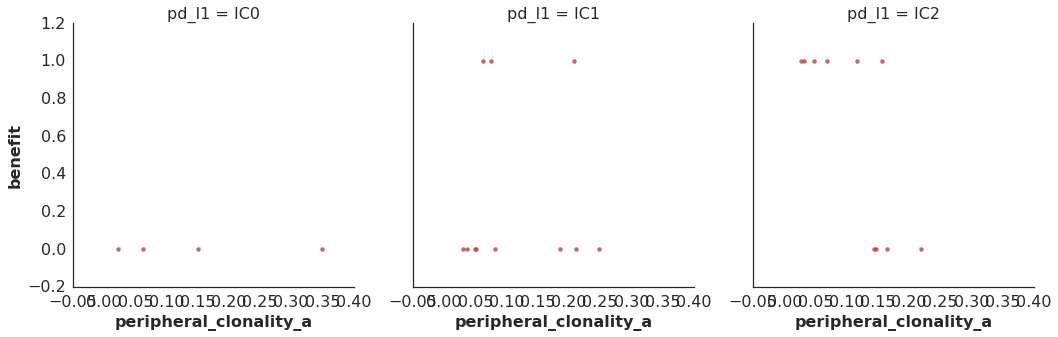

In [24]:
# inspect raw data - are results reasonable?
sb.lmplot(data = df, x = 'peripheral_clonality_a', y = 'benefit', col='pd_l1', logistic=True, fit_reg=False)

## try with horseshoe prior on beta coefs

In [25]:
models = survivalstan.utils.read_files('../utils/stan')

../utils/stan/logistic_model.stan
../utils/stan/pem_survival_model_randomwalk_custom_coefs_expressed_missense_and_neoant_mutations.stan
../utils/stan/logistic_model_by_group.stan
../utils/stan/pem_survival_model_unstructured_varcoef.stan
../utils/stan/pem_survival_model_unstructured_varcoef_hsprior.stan
../utils/stan/pem_survival_model_randomwalk_tvc.stan
../utils/stan/pem_survival_model_randomwalk_alt.stan
../utils/stan/pem_survival_model_randomwalk_bspline_est_xi.stan
../utils/stan/pem_survival_model_varying_coefs3.stan
../utils/stan/pem_survival_model_randomwalk.stan
../utils/stan/pem_survival_model_randomwalk_custom_coefs_rate_only.stan
../utils/stan/pem_survival_model_gamma.stan
../utils/stan/pem_survival_model_randomwalk_custom_coefs_missense_and_neoant_rates.stan
../utils/stan/pem_survival_model_randomwalk_tvc2.stan
../utils/stan/pem_survival_model_varying_coefs2.stan
../utils/stan/pem_survival_model_varying_coefs4.stan
../utils/stan/pem_survival_model_randomwalk_bspline_est_xi2

In [26]:
survstan_pfs_varcoef2 = functools.partial(
    survivalstan.fit_stan_survival_model,
    df = df_long_pfs,
    model_code = models['pem_survival_model_unstructured_varcoef_hsprior.stan'],
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    sample_col = 'patient_id',
    chains = 4,
    iter = 10000,
    grp_coef_type = 'vector-of-vectors',
    seed = seed,
    stan_data = {'nu': 1} 
    )

In [27]:
tcrclonality_by_pdl12 = survstan_pfs_varcoef2(formula = 'log_peripheral_clonality_a_centered_by_pd_l1', 
                                              group_col = 'pd_l1',
                                              )

NOT reusing model.
Ran in 354.585 sec.


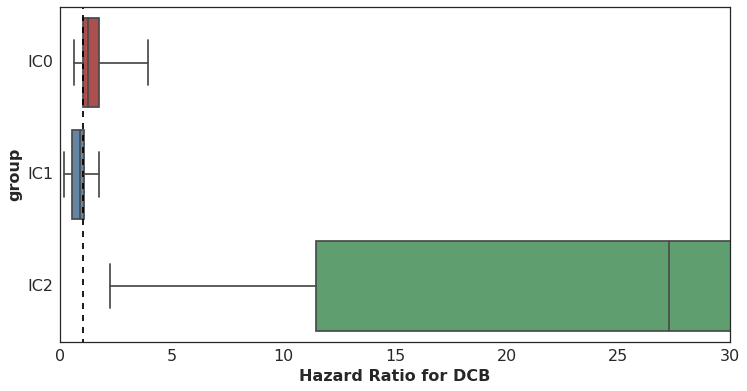

In [28]:
#paper.hyper_figure_label_printer('hr_tcrclonality_by_pdl1_pfs')
current_fig_size = plt.rcParams["figure.figsize"]
new_fig_size = [current_fig_size[0]*2, current_fig_size[1]]
plt.rcParams["figure.figsize"] = new_fig_size
## plot
sb.boxplot(data=tcrclonality_by_pdl12['grp_coefs'], x='exp(beta)', y='group', fliersize=0, whis=[2.5, 97.5])
_ = plt.xlim([0, 30])
_ = plt.vlines(1, -10, 10, linestyles='--')
#_ = plt.title('Hazard associated with log(Peripheral clonality at timepoint A) \n by level of intratumoral PD-L1 expression')
_ = plt.xlabel('Hazard Ratio for {}'.format(cohort.benefit_plot_name))
## revert width to original size
plt.rcParams["figure.figsize"] = current_fig_size

In [29]:
tcrclonality_by_pdl12['grp_coefs']['group_label'] = tcrclonality_by_pdl12['grp_coefs'].group.apply(
    lambda x: 'hr_clonality_pfs_hsprior_among_{}'.format(x)
)
for (name, ic_class), group in tcrclonality_by_pdl12['grp_coefs'].groupby(['group_label','group']):
    group_n = len(df.loc[df.pd_l1==ic_class,'pd_l1'])
    paper.hyper_label_printer(formatter=paper.hr_posterior_formatter, label=name, n=group_n, series=group['exp(beta)'])

{{{hr_clonality_pfs_hsprior_among_IC0:n=4, HR=1.53, 95% CI (0.64, 3.95)}}}
{{{hr_clonality_pfs_hsprior_among_IC1:n=11, HR=0.85, 95% CI (0.18, 1.73)}}}
{{{hr_clonality_pfs_hsprior_among_IC2:n=10, HR=100.06, 95% CI (2.24, 636.85)}}}


## Analysis of correlation with OS, instead of PFS

In [30]:
tcrclonality_by_pdl1_os = survstan_os_varcoef(
    formula = 'log_peripheral_clonality_a_centered_by_pd_l1', 
    group_col = 'pd_l1',
    )

Reusing model.
Ran in 78.266 sec.


{{{tcrclonality_by_pdl1_os}}}


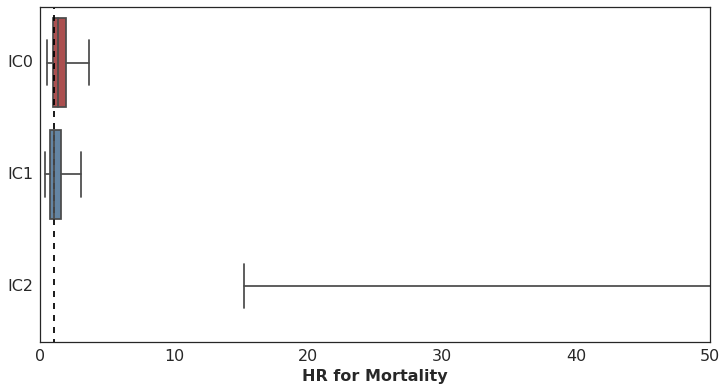

In [31]:
## capture current figure size
paper.hyper_figure_label_printer('tcrclonality_by_pdl1_os')
## make this plot much wider than usual
current_fig_size = plt.rcParams["figure.figsize"]
new_fig_size = [current_fig_size[0]*2, current_fig_size[1]]
plt.rcParams["figure.figsize"] = new_fig_size
## plot
sb.boxplot(data=tcrclonality_by_pdl1_os['grp_coefs'], x='exp(beta)', y='group', fliersize=0, whis=[2.5, 97.5])
_ = plt.xlim([0, 50])
_ = plt.ylabel('')
_ = plt.vlines(1, -10, 10, linestyles='--')
#_ = plt.title('Hazard associated with log(Peripheral clonality at timepoint A) \n by level of intratumoral PD-L1 expression')
_ = plt.xlabel('HR for {}'.format(cohort.hazard_os_plot_name))
## revert width to original size
plt.rcParams["figure.figsize"] = current_fig_size

{{{tcrclonality_by_pdl1_os_split}}}


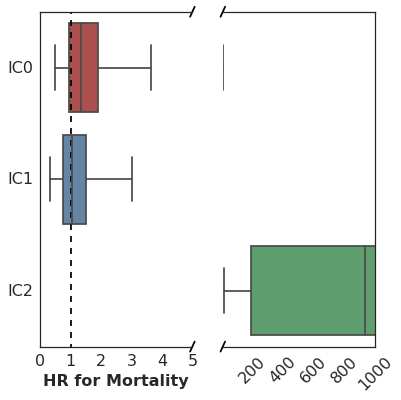

In [32]:
paper.hyper_figure_label_printer('tcrclonality_by_pdl1_os_split')
## plot side-by-side zoomed & unzoomed plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sb.boxplot(data=tcrclonality_by_pdl1_os['grp_coefs'],
           x='exp(beta)',
           y='group',
           fliersize=0,
           whis=[2.5, 97.5], 
           ax=ax1,
          )
ax1.set_xlim([0, 5.])
ax1.set_ylabel('')
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax1.set_yticklabels([0,1,2],['','',''])
#ax1.vlines(1, -10, 10, linestyles='--')
#ax1.set_yticks([0])
#ax1.get_yaxis().set_visible(False)

sb.boxplot(data=tcrclonality_by_pdl1_os['grp_coefs'],
           x='exp(beta)',
           y='group',
           fliersize=0,
           whis=[2.5, 97.5],
           ax=ax2,
          )
ax2.set_xlim([5.7, 1000])
ax2.set_ylabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # bottom-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # top-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-left diagonal

ax1.vlines(1, -10, 10, linestyles='--')
ax1.set_xlabel('HR for {}'.format(cohort.hazard_os_plot_name))
ax2.set_xlabel('')
## rotate labels on x axis
_ = plt.setp(ax1.get_xticklabels(), rotation=0)
_ = plt.setp(ax2.get_xticklabels(), rotation=45)

## look at TCR clonality by pd-l1 using logit models

In [33]:
logit_pfs = functools.partial(
    survivalstan.fit_stan_survival_model,
    df = df,
    model_code = models['logistic_model_by_group.stan'],
    time_col = 'pfs', # not used, included for consistency
    event_col = 'is_benefit',
    chains = 4,
    iter = 10000,
    seed = seed,
    )
logit_os = functools.partial(
    survivalstan.fit_stan_survival_model,
    df = df,
    model_code = models['logistic_model_by_group.stan'],
    time_col = 'os', # not used, included for consistency
    event_col = 'is_benefit_os',
    chains = 4,
    iter = 10000,
    seed = seed,
    )

In [34]:
tcrclonality_by_pdl1_logit_pfs = logit_pfs(
    formula = 'log_peripheral_clonality_a_centered_by_pd_l1', 
    group_col = 'pd_l1',
    )


NOT reusing model.
Ran in 50.944 sec.


{{{tcrclonality_by_pdl1_logit_pfs}}}


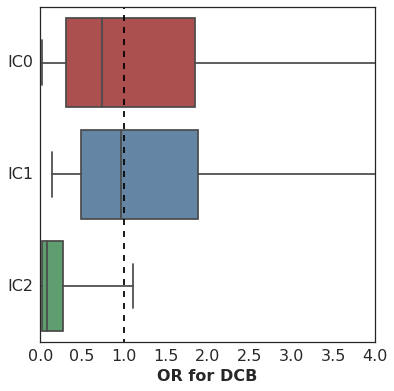

In [35]:
paper.hyper_figure_label_printer('tcrclonality_by_pdl1_logit_pfs')
## plot side-by-side zoomed & unzoomed plots
f, ax1 = plt.subplots(1, 1)
sb.boxplot(data=tcrclonality_by_pdl1_logit_pfs['grp_coefs'],
           x='exp(beta)',
           y='group',
           fliersize=0,
           whis=[2.5, 97.5], 
           ax=ax1,
          )
ax1.set_xlim([0, 4.])
ax1.set_ylabel('')
ax1.vlines(1, -10, 10, linestyles='--')
ax1.set_xlabel('OR for {}'.format(cohort.benefit_plot_name))
## rotate labels on x axis
#_ = plt.setp(ax1.get_xticklabels(), rotation='vertical')
#_ = plt.setp(ax2.get_xticklabels(), rotation='vertical')

In [36]:
tcrclonality_by_pdl1_logit_os = logit_os(
    formula = 'log_peripheral_clonality_a_centered_by_pd_l1', 
    group_col = 'pd_l1',
    )


Reusing model.
Ran in 2.286 sec.


{{{tcrclonality_by_pdl1_logit_os}}}


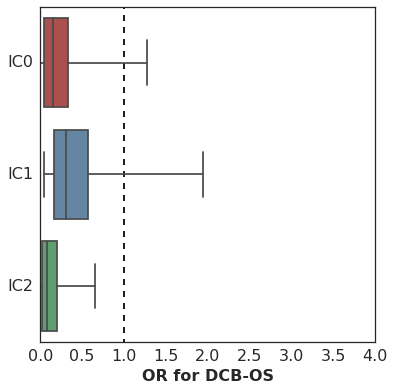

In [37]:
paper.hyper_figure_label_printer('tcrclonality_by_pdl1_logit_os')
## plot side-by-side zoomed & unzoomed plots
f, ax1 = plt.subplots(1, 1)
sb.boxplot(data=tcrclonality_by_pdl1_logit_os['grp_coefs'],
           x='exp(beta)',
           y='group',
           fliersize=0,
           whis=[2.5, 97.5], 
           ax=ax1,
          )
ax1.set_xlim([0, 4.])
ax1.set_ylabel('')
ax1.vlines(1, -10, 10, linestyles='--')
ax1.set_xlabel('OR for {}'.format(cohort.benefit_os_plot_name))
## rotate labels on x axis
#_ = plt.setp(ax1.get_xticklabels(), rotation='vertical')
#_ = plt.setp(ax2.get_xticklabels(), rotation='vertical')